In [15]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import seaborn as sns
from glob import glob
import itertools
import numpy as np
from matplotlib.colors import to_rgb, to_hex

In [16]:
# Set plot style
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-paper')

# set font scale
sns.set(font_scale=1.5)

In [52]:
def load_data(summary_json_path):
    """Load data directly from the combined summary JSON file"""
    with open(summary_json_path, 'r') as f:
        summary = json.load(f)
    
    data = []
    
    # Extract approach from directory path
    approach = os.path.basename(os.path.dirname(os.path.dirname(summary_json_path)))
    
    # Process each directory in the summary
    dir_path = list(summary.keys())[0]
    for dir_path_2 in summary[dir_path].keys():
        metname = list(summary[dir_path][dir_path_2].keys())[2]
        gtime = summary[dir_path][dir_path_2]['gtime']
        params = summary[dir_path][dir_path_2]['parameters']
        metrics = summary[dir_path][dir_path_2][metname]
        metrics = metrics[list(metrics.keys())[0]]
        
        # Convert time to seconds
        time_seconds = float(gtime['elapsed real time (wall clock) in seconds'])
        # Convert memory to GB
        memory_gb = float(gtime['maximum resident set size in KB']) / 1024 / 1024

        summary_and_perf = {
            'Approach': approach,
            'wall_time_seconds': time_seconds,
            'memory_gb': memory_gb,
            'directory': dir_path,
        }
        
        summary_and_perf.update(params)
        summary_and_perf.update(metrics)
        summary_and_perf.update(gtime)
        summary_and_perf.pop("Parameters")
        
        data.append(summary_and_perf)
        
    
    return pd.DataFrame(data)

# Load data from your combined summary files
full_df = load_data("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/full/summary/summary.json")
full_df = full_df.assign(Approach="Full HiCNN")
roi_expected_df = load_data("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/roi/expected/summary/summary.json")
roi_expected_df = roi_expected_df.assign(Approach="ROI HiCNN + Expected")
roi_lowres_df = load_data("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/roi/lowres/summary/summary.json")
roi_lowres_df =roi_lowres_df.assign(Approach="ROI HiCNN + Lowres")

# Combine all dataframes
df = pd.concat([full_df, roi_expected_df, roi_lowres_df], ignore_index=True)

In [53]:
# Make any possible columns in df numeric
df = df.apply(pd.to_numeric, errors='ignore')

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1087819028.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [19]:
df.to_csv("/Users/amulyagarimella/Documents/2241finalproject/outputs/experiment_summary.csv", index=False)

In [20]:
df_without_random = df[df['ROI_METHOD'] != 'random']
df_with_roi = df[df['USE_ROI'] == 1]

## Fig 1: Overall performance comparison (without random)

In [21]:
os.makedirs('../figures/fig1', exist_ok=True)



# Define colors for different approaches
approach_colors = {
    'Full HiCNN': '#0072B2',  # Blue
    'ROI HiCNN + Expected': '#E69F00',  # Orange
    'ROI HiCNN + Lowres': '#009E73'  # Green
}

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/2938134834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=performance_metric[0], palette=approach_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/2938134834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=performance_metric[0], palette=approach_colors, ax=ax[i])


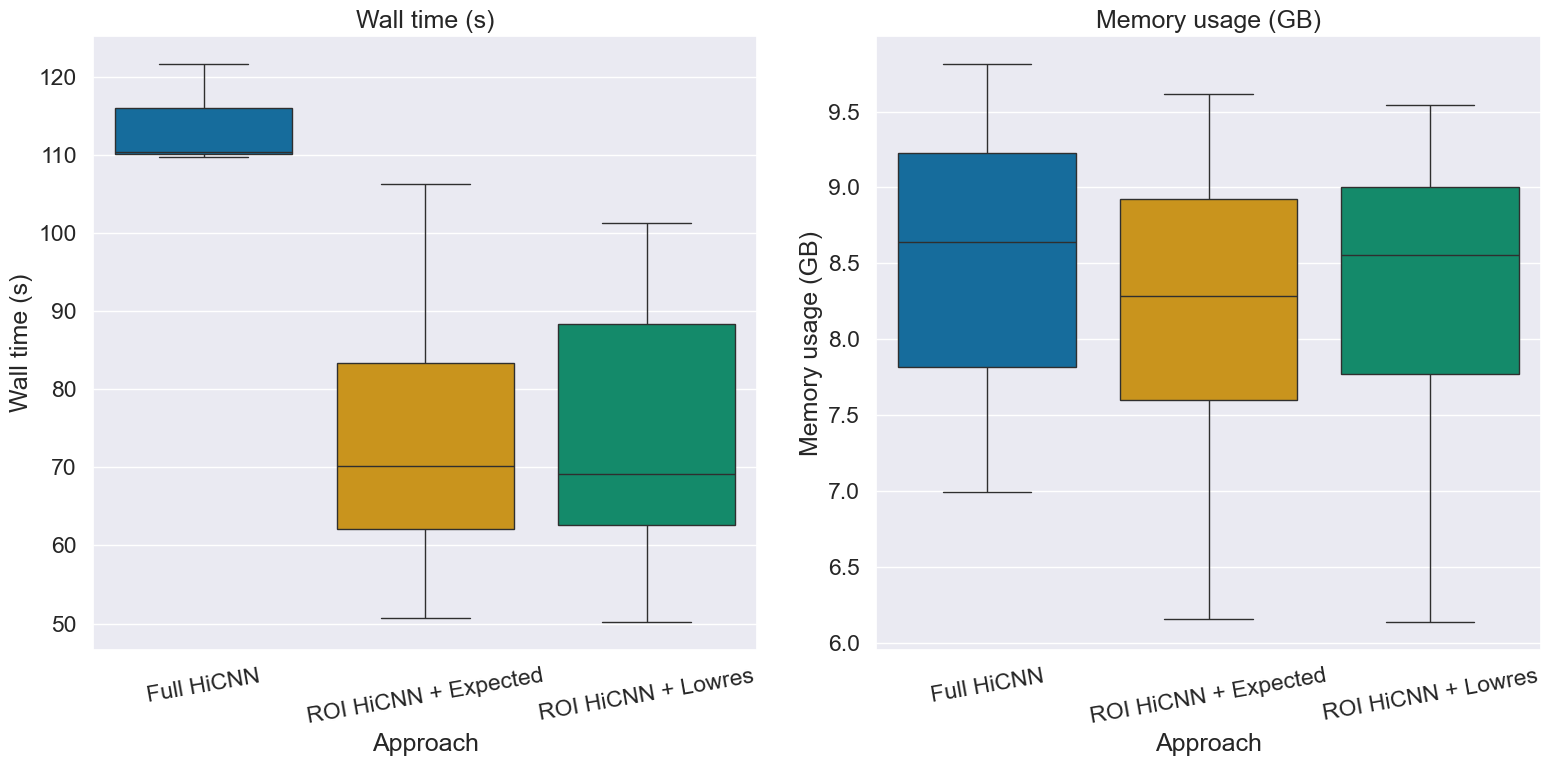

In [22]:
fig, ax = plt.subplots(1,2, figsize=(16, 8), sharex=True)
ax = ax.flatten()
for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    sns.boxplot(data=df_without_random, x='Approach', y=performance_metric[0], palette=approach_colors, ax=ax[i])
    ax[i].set_title(f'{performance_metric[1]}')
    ax[i].set_ylabel(f'{performance_metric[1]}')
    ax[i].set_xlabel('Approach')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig1/performance.png', bbox_inches='tight')
plt.show()

## Fig 2: Overall quality comparison (without random)

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3772013010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=approach_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3772013010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=approach_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3772013010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

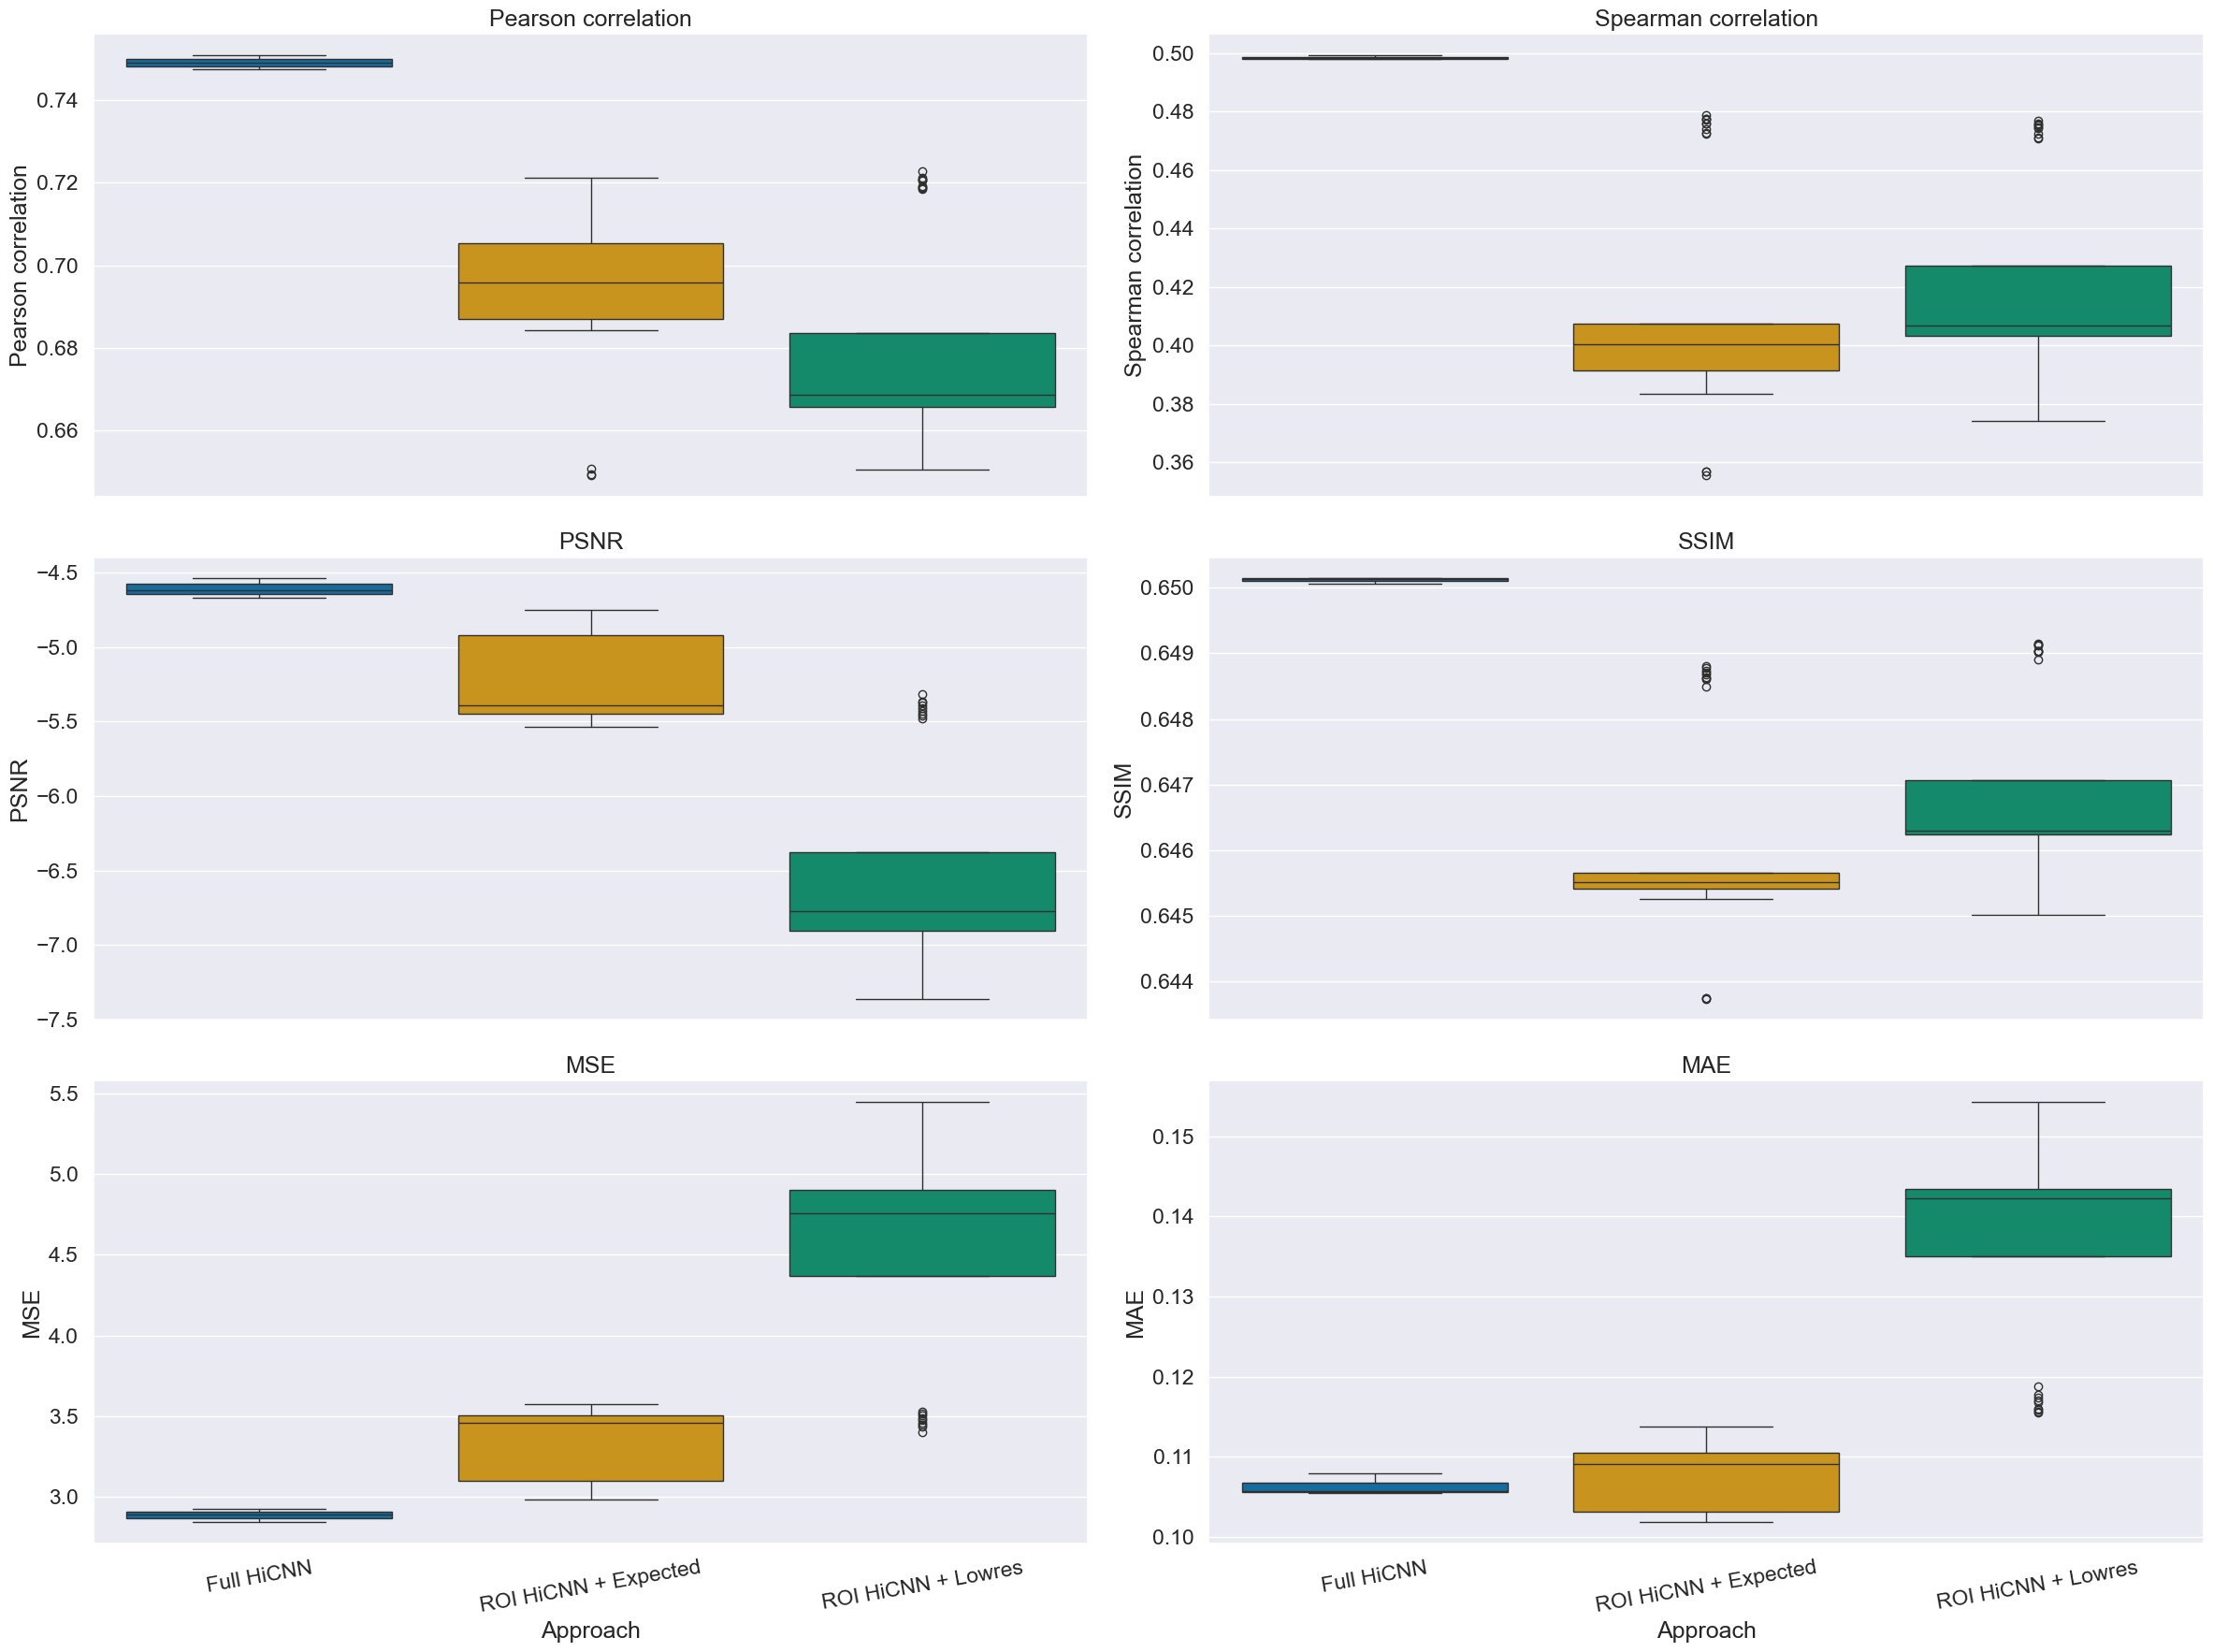

In [24]:
os.makedirs('../figures/fig2', exist_ok=True)

fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
    sns.boxplot(data=df_without_random, x='Approach', y=quality_measure[0], palette=approach_colors, ax=ax[i])
    ax[i].set_title(f'{quality_measure[1]}')
    ax[i].set_ylabel(f'{quality_measure[1]}')
    ax[i].set_xlabel('Approach')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig2/quality_comparison.png', bbox_inches='tight')
plt.show()

## Fig 3: Impact of ROI model choice on performance metrics

In [25]:
os.makedirs('../figures/fig3', exist_ok=True)

In [26]:
methods = df['ROI_METHOD'].unique()
methods_ordered = list(methods)
methods_ordered.remove('random')
methods_ordered.append('random')

methods_colors = sns.color_palette("husl", len(methods)-1)
methods_colors.append('red')

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/950694106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/950694106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])


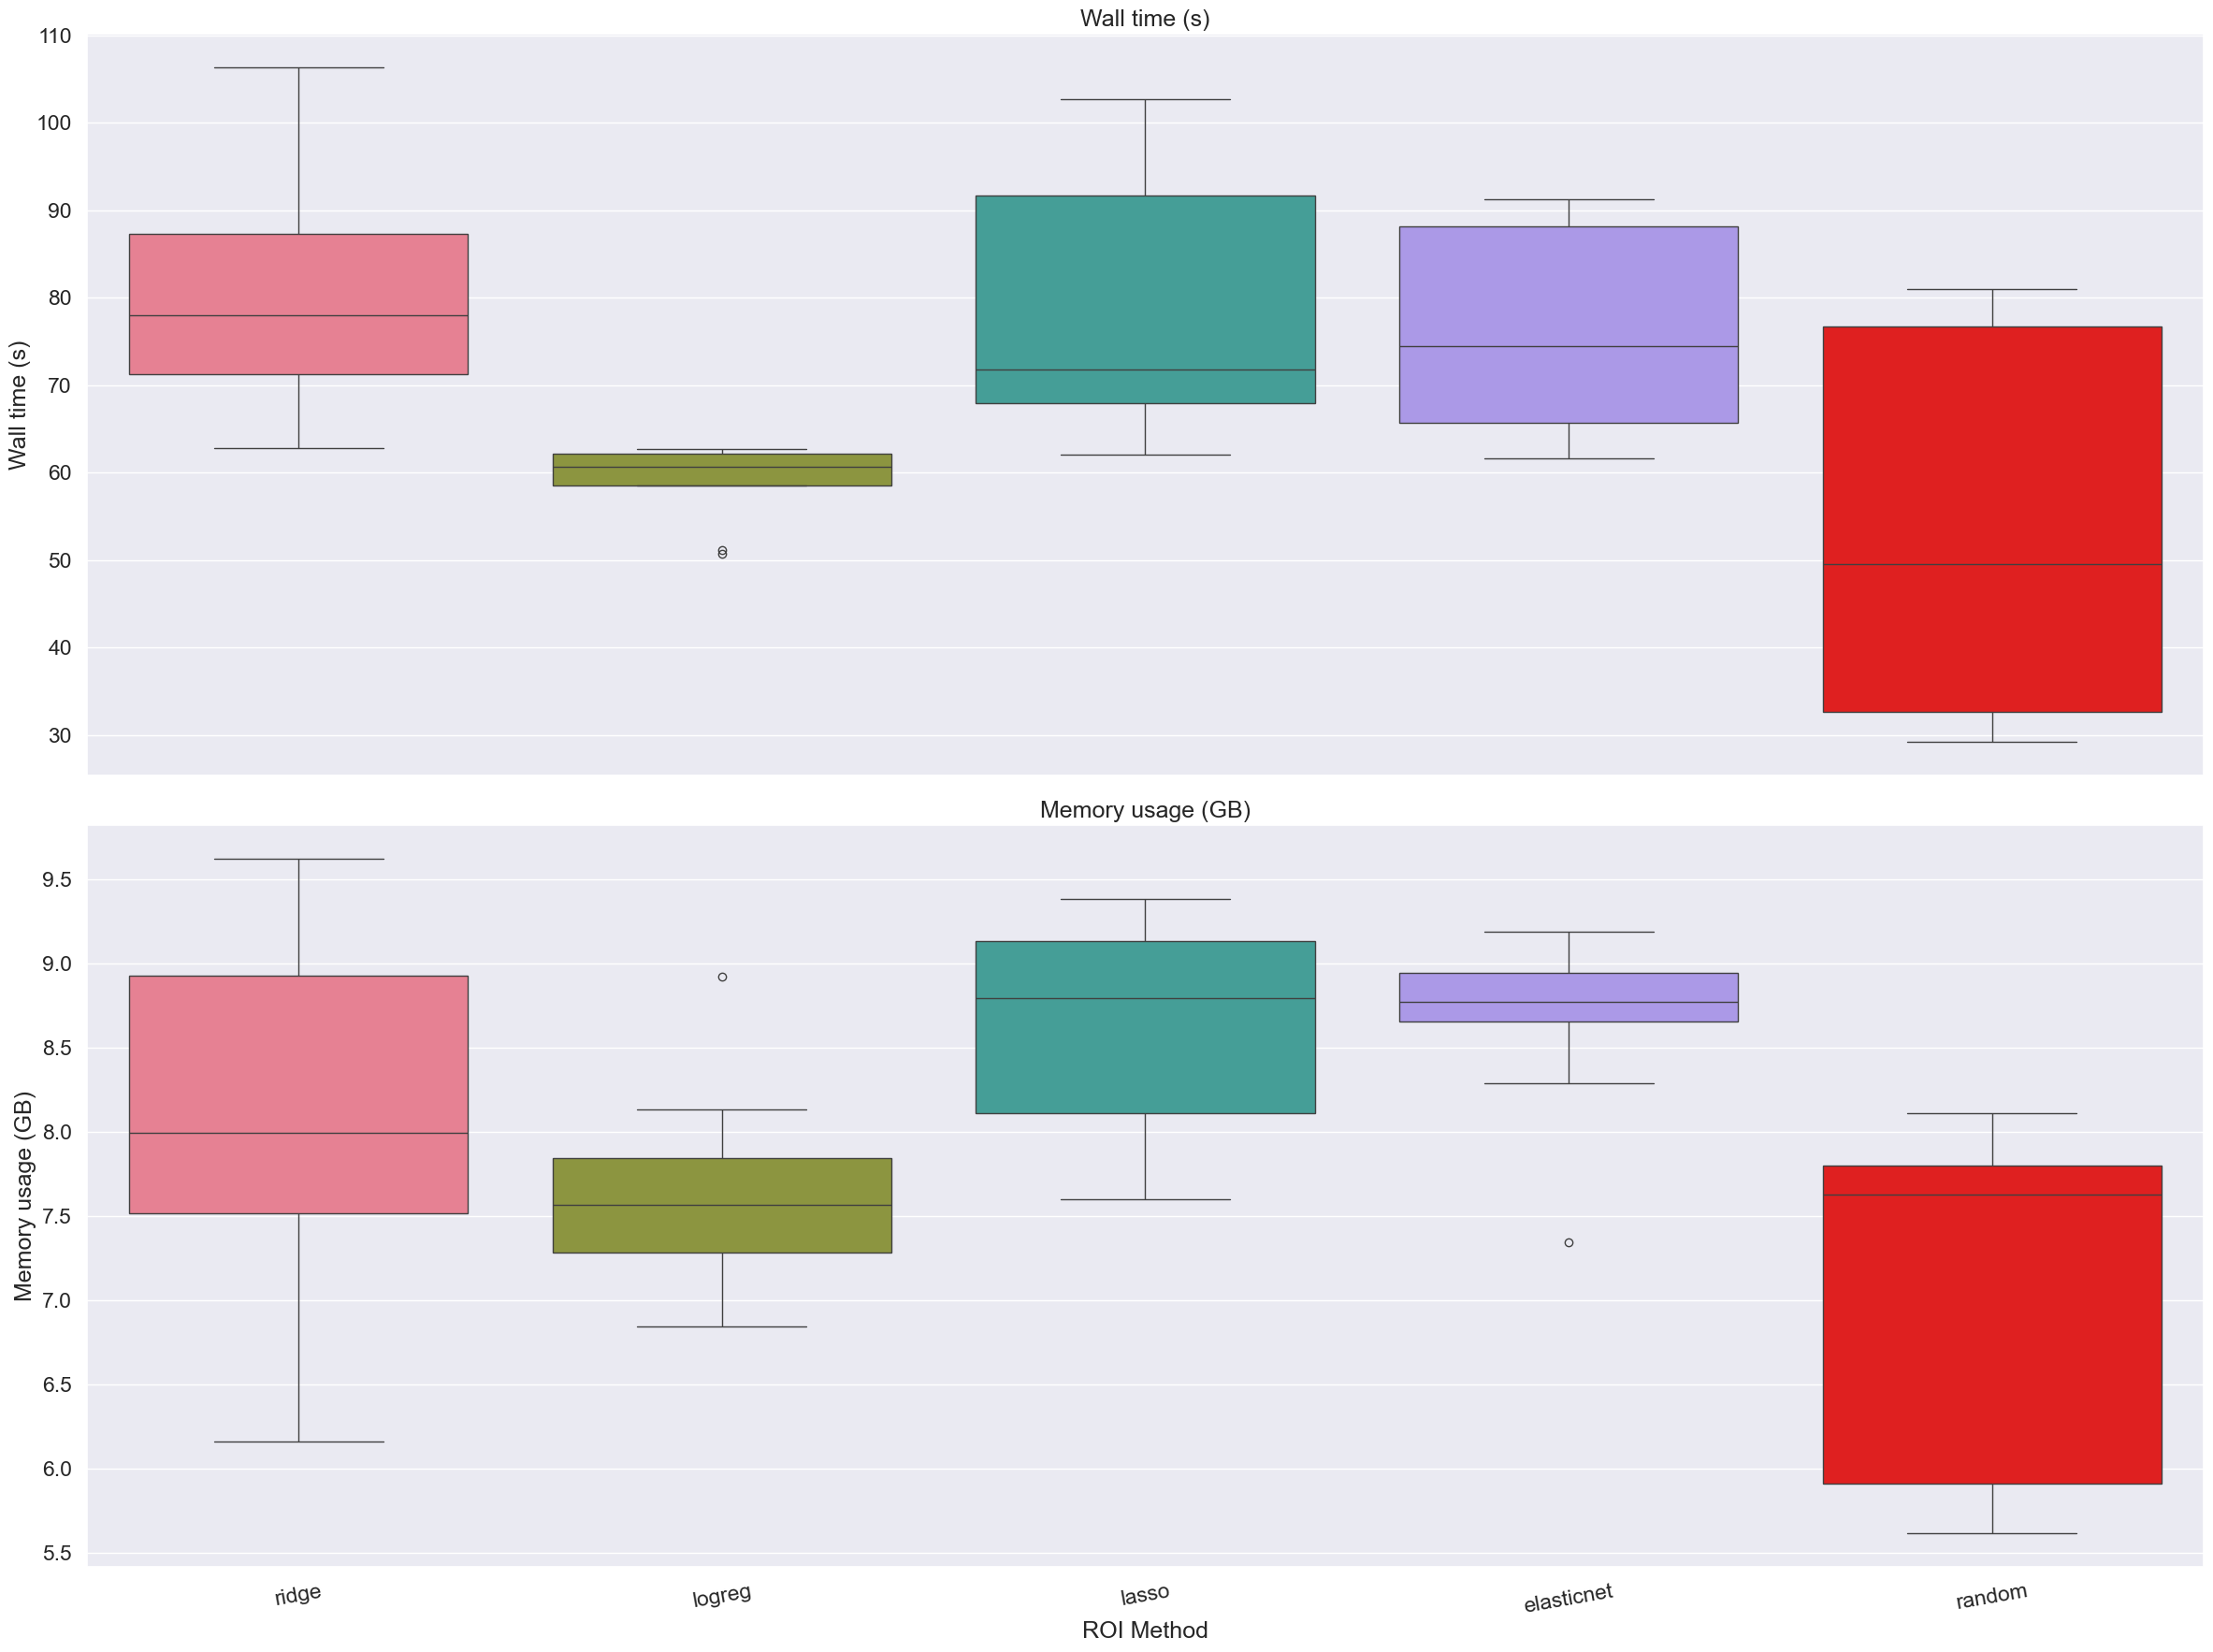

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/950694106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/950694106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])


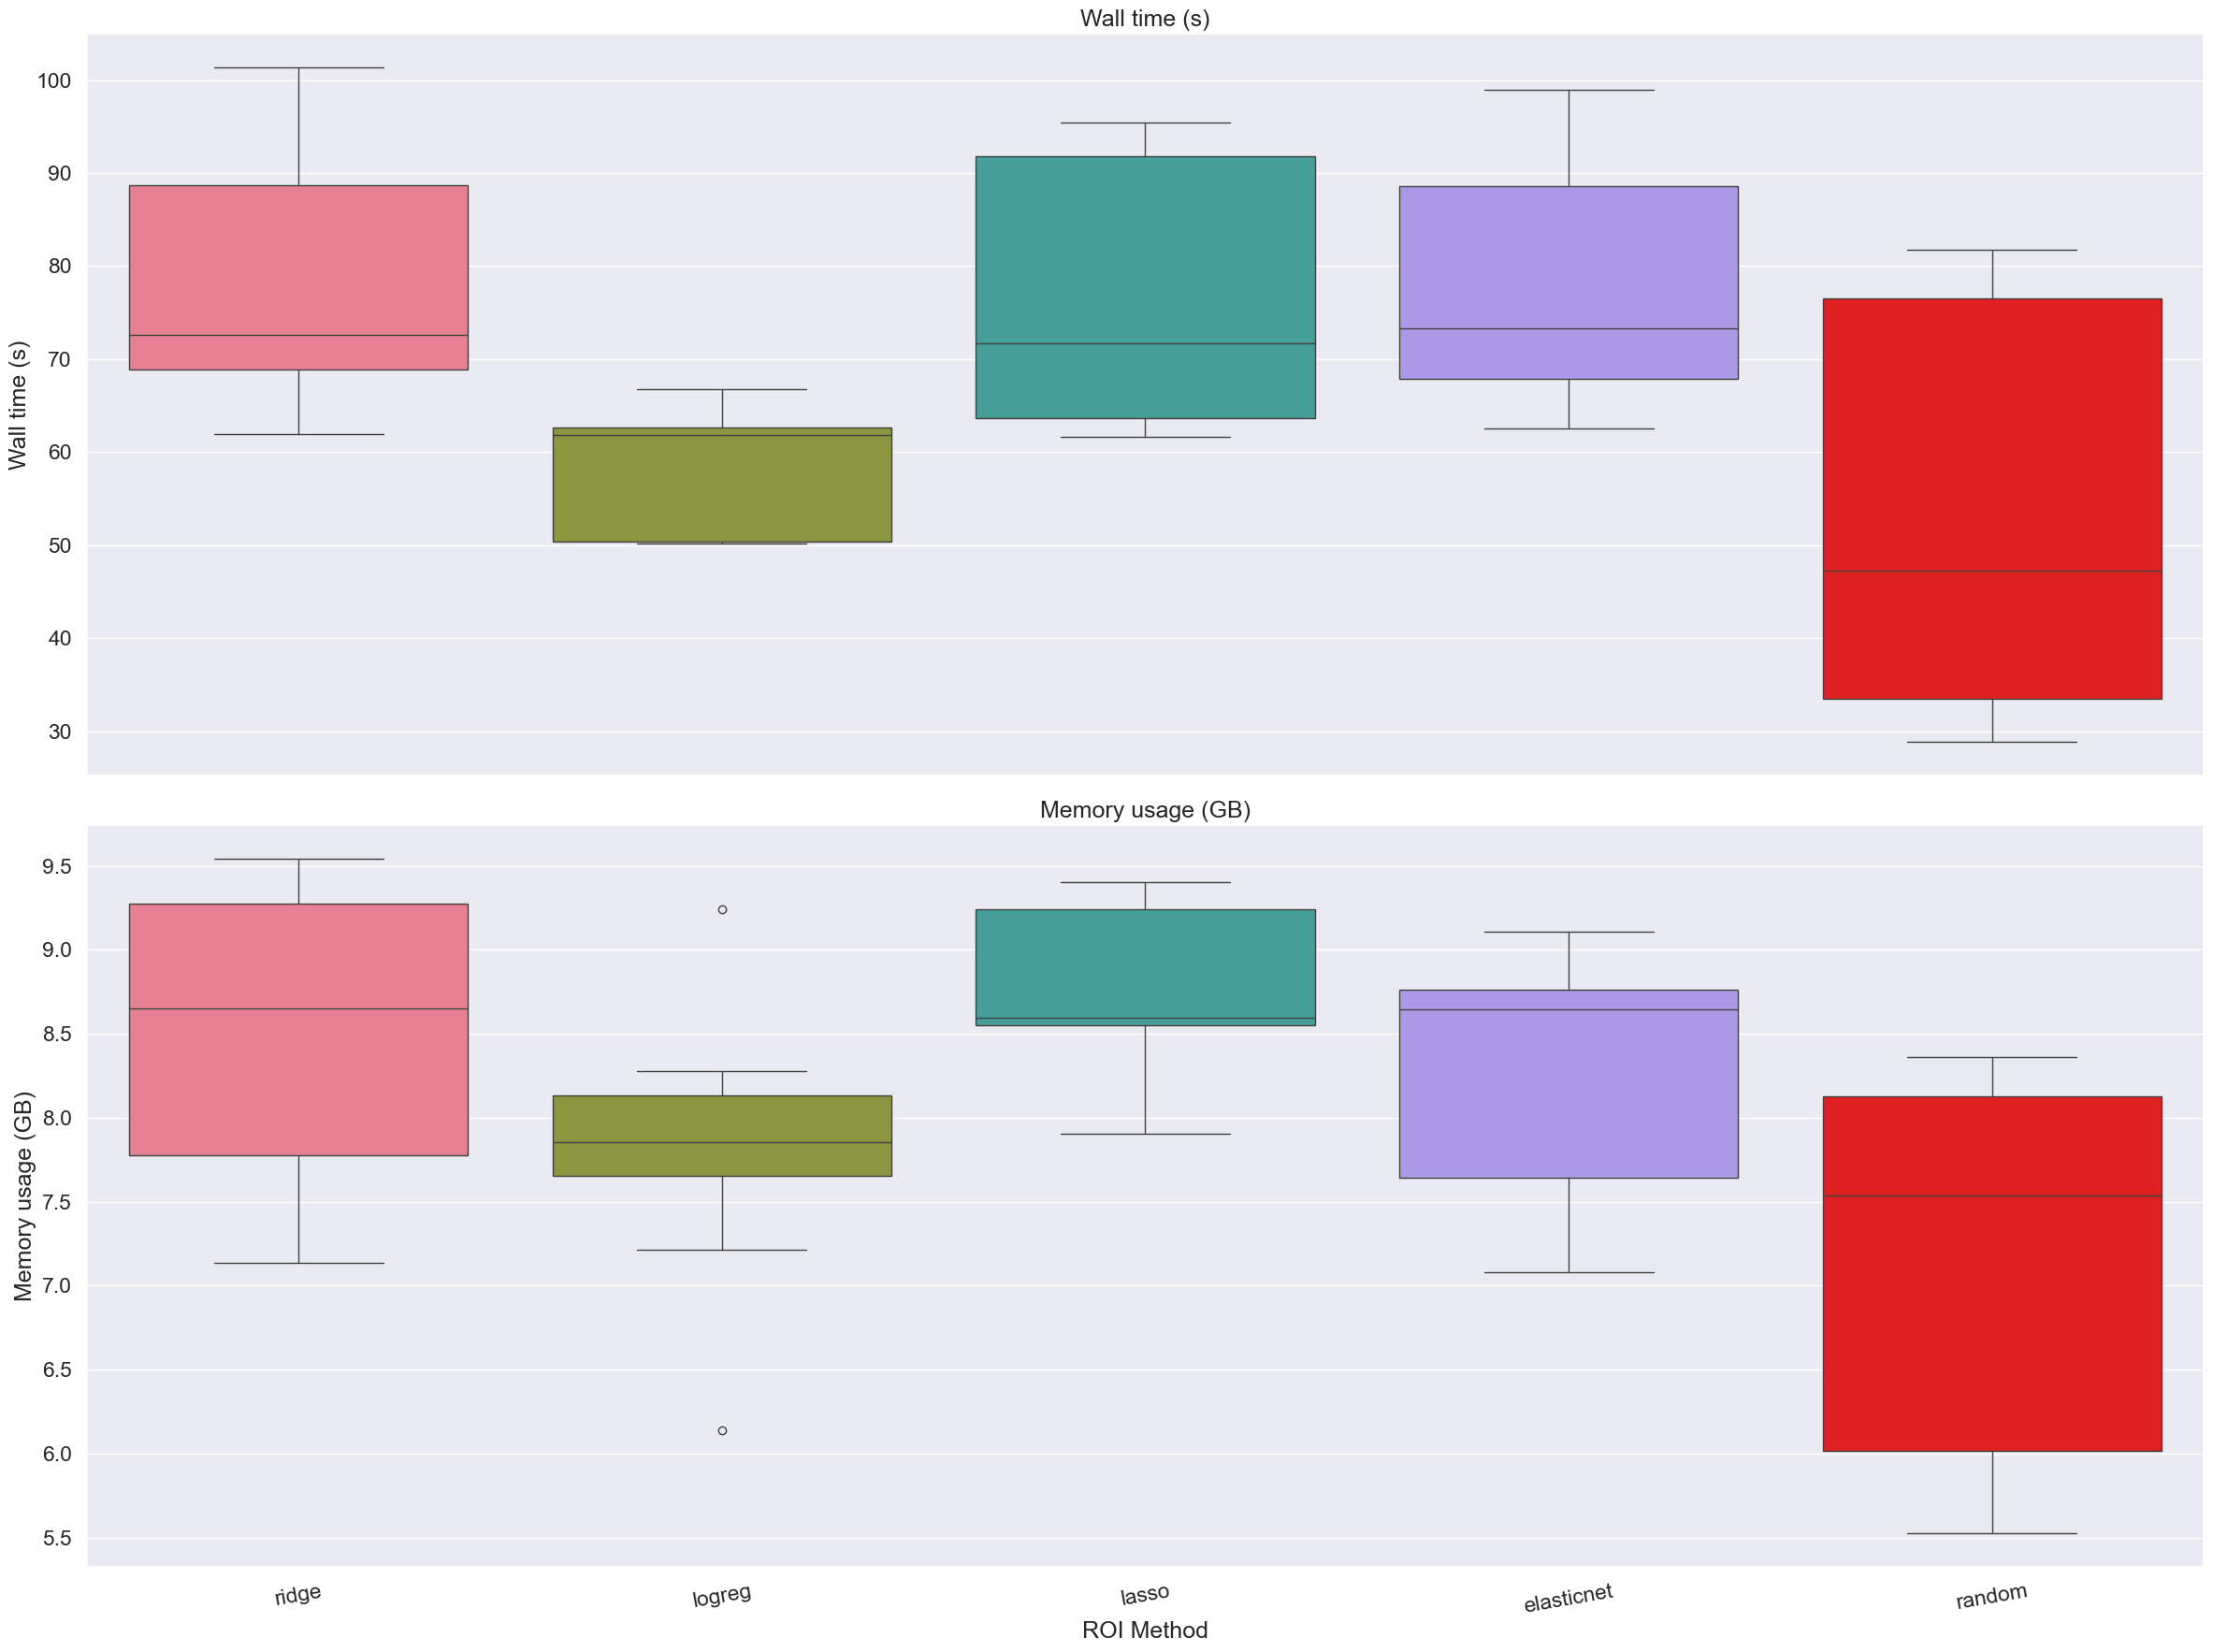

In [27]:
for approach in ['ROI HiCNN + Expected', 'ROI HiCNN + Lowres']:
    fig, ax = plt.subplots(2,1, figsize=(24, 18), sharex=True)
    ax = ax.flatten()
    for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
        sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
        ax[i].set_title(f'{performance_metric[1]}')
        ax[i].set_ylabel(f'{performance_metric[1]}')
        ax[i].set_xlabel('ROI Method')
        ax[i].tick_params(axis='x', rotation=10)

    plt.tight_layout()
    plt.savefig(f'../figures/fig3/roi_performance_{approach.replace(" + ", "_").replace(" ", "_").lower()}.png', bbox_inches='tight')
    plt.show()

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1330038026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1330038026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])


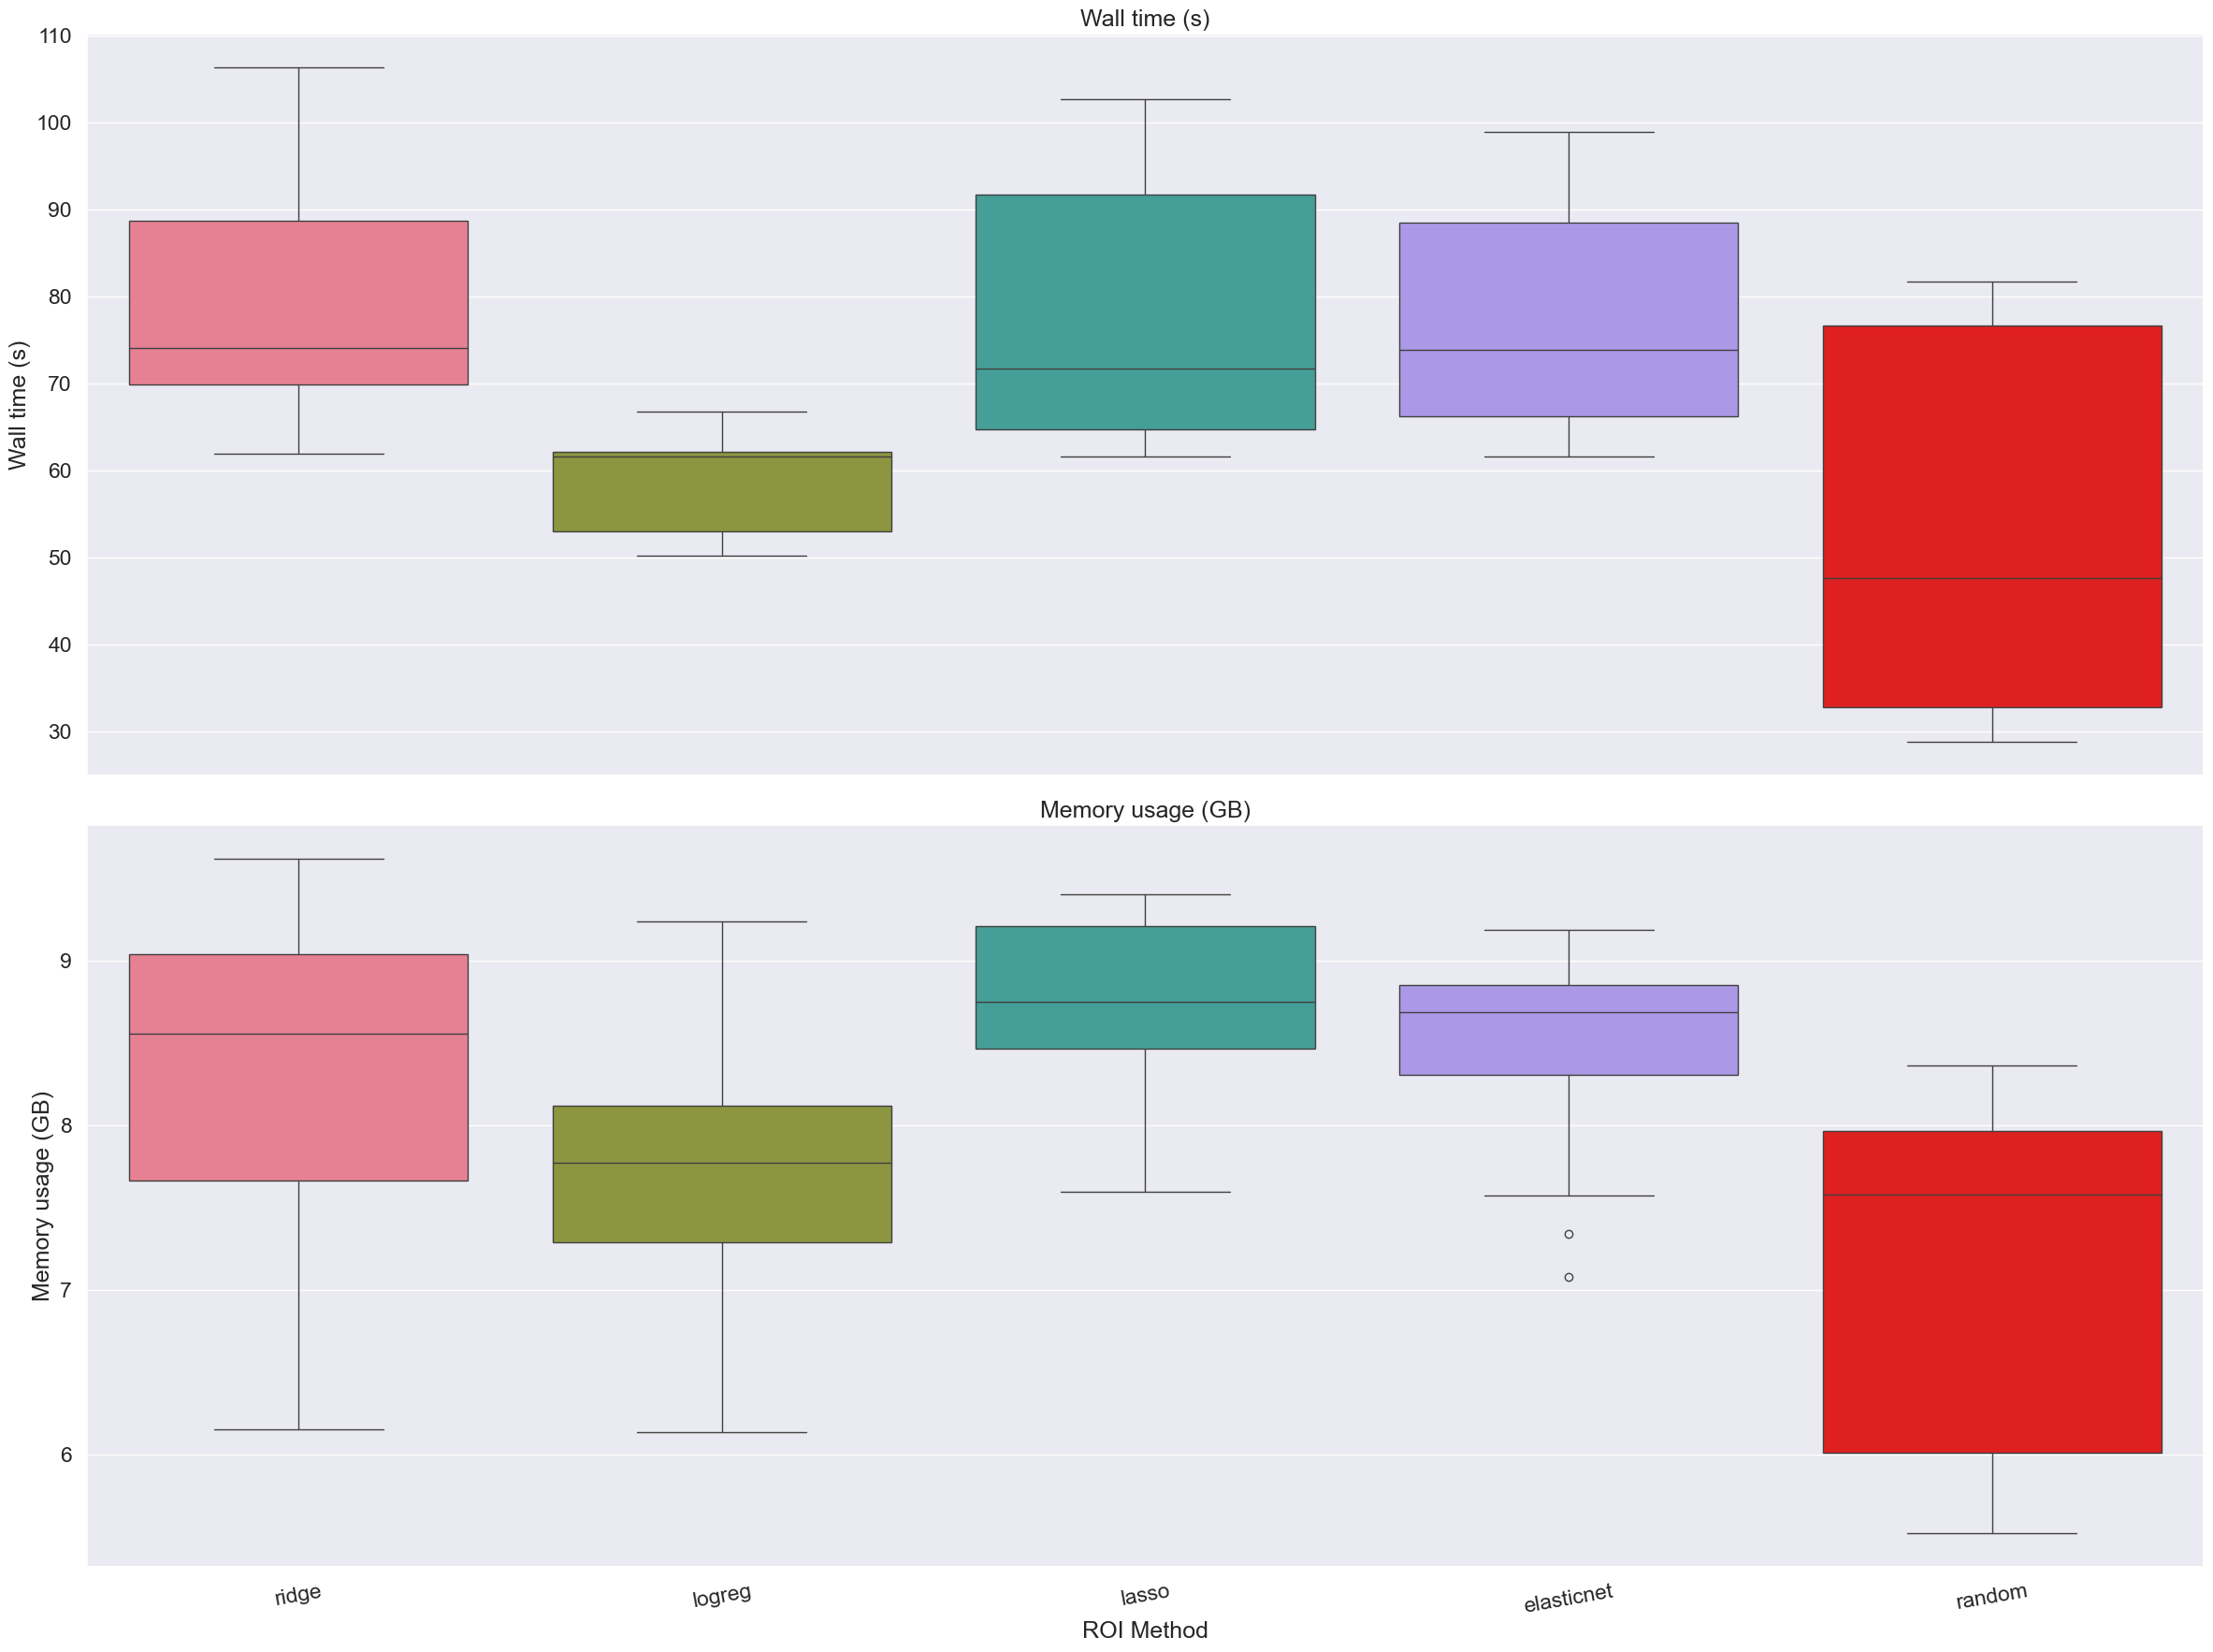

In [28]:

fig, ax = plt.subplots(2,1, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=performance_metric[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
    ax[i].set_title(f'{performance_metric[1]}')
    ax[i].set_ylabel(f'{performance_metric[1]}')
    ax[i].set_xlabel('ROI Method')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig3/roi_performance_agg.png', bbox_inches='tight')
plt.show()

## Fig 4: Impact of ROI model choice on quality metrics

In [29]:

os.makedirs('../figures/fig4', exist_ok=True)


methods = df['ROI_METHOD'].unique()
methods_ordered = list(methods)
methods_ordered.remove('random')
methods_ordered.append('random')

methods_colors = sns.color_palette("husl", len(methods)-1)
methods_colors.append('red')

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/734805666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/734805666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/734805666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is d

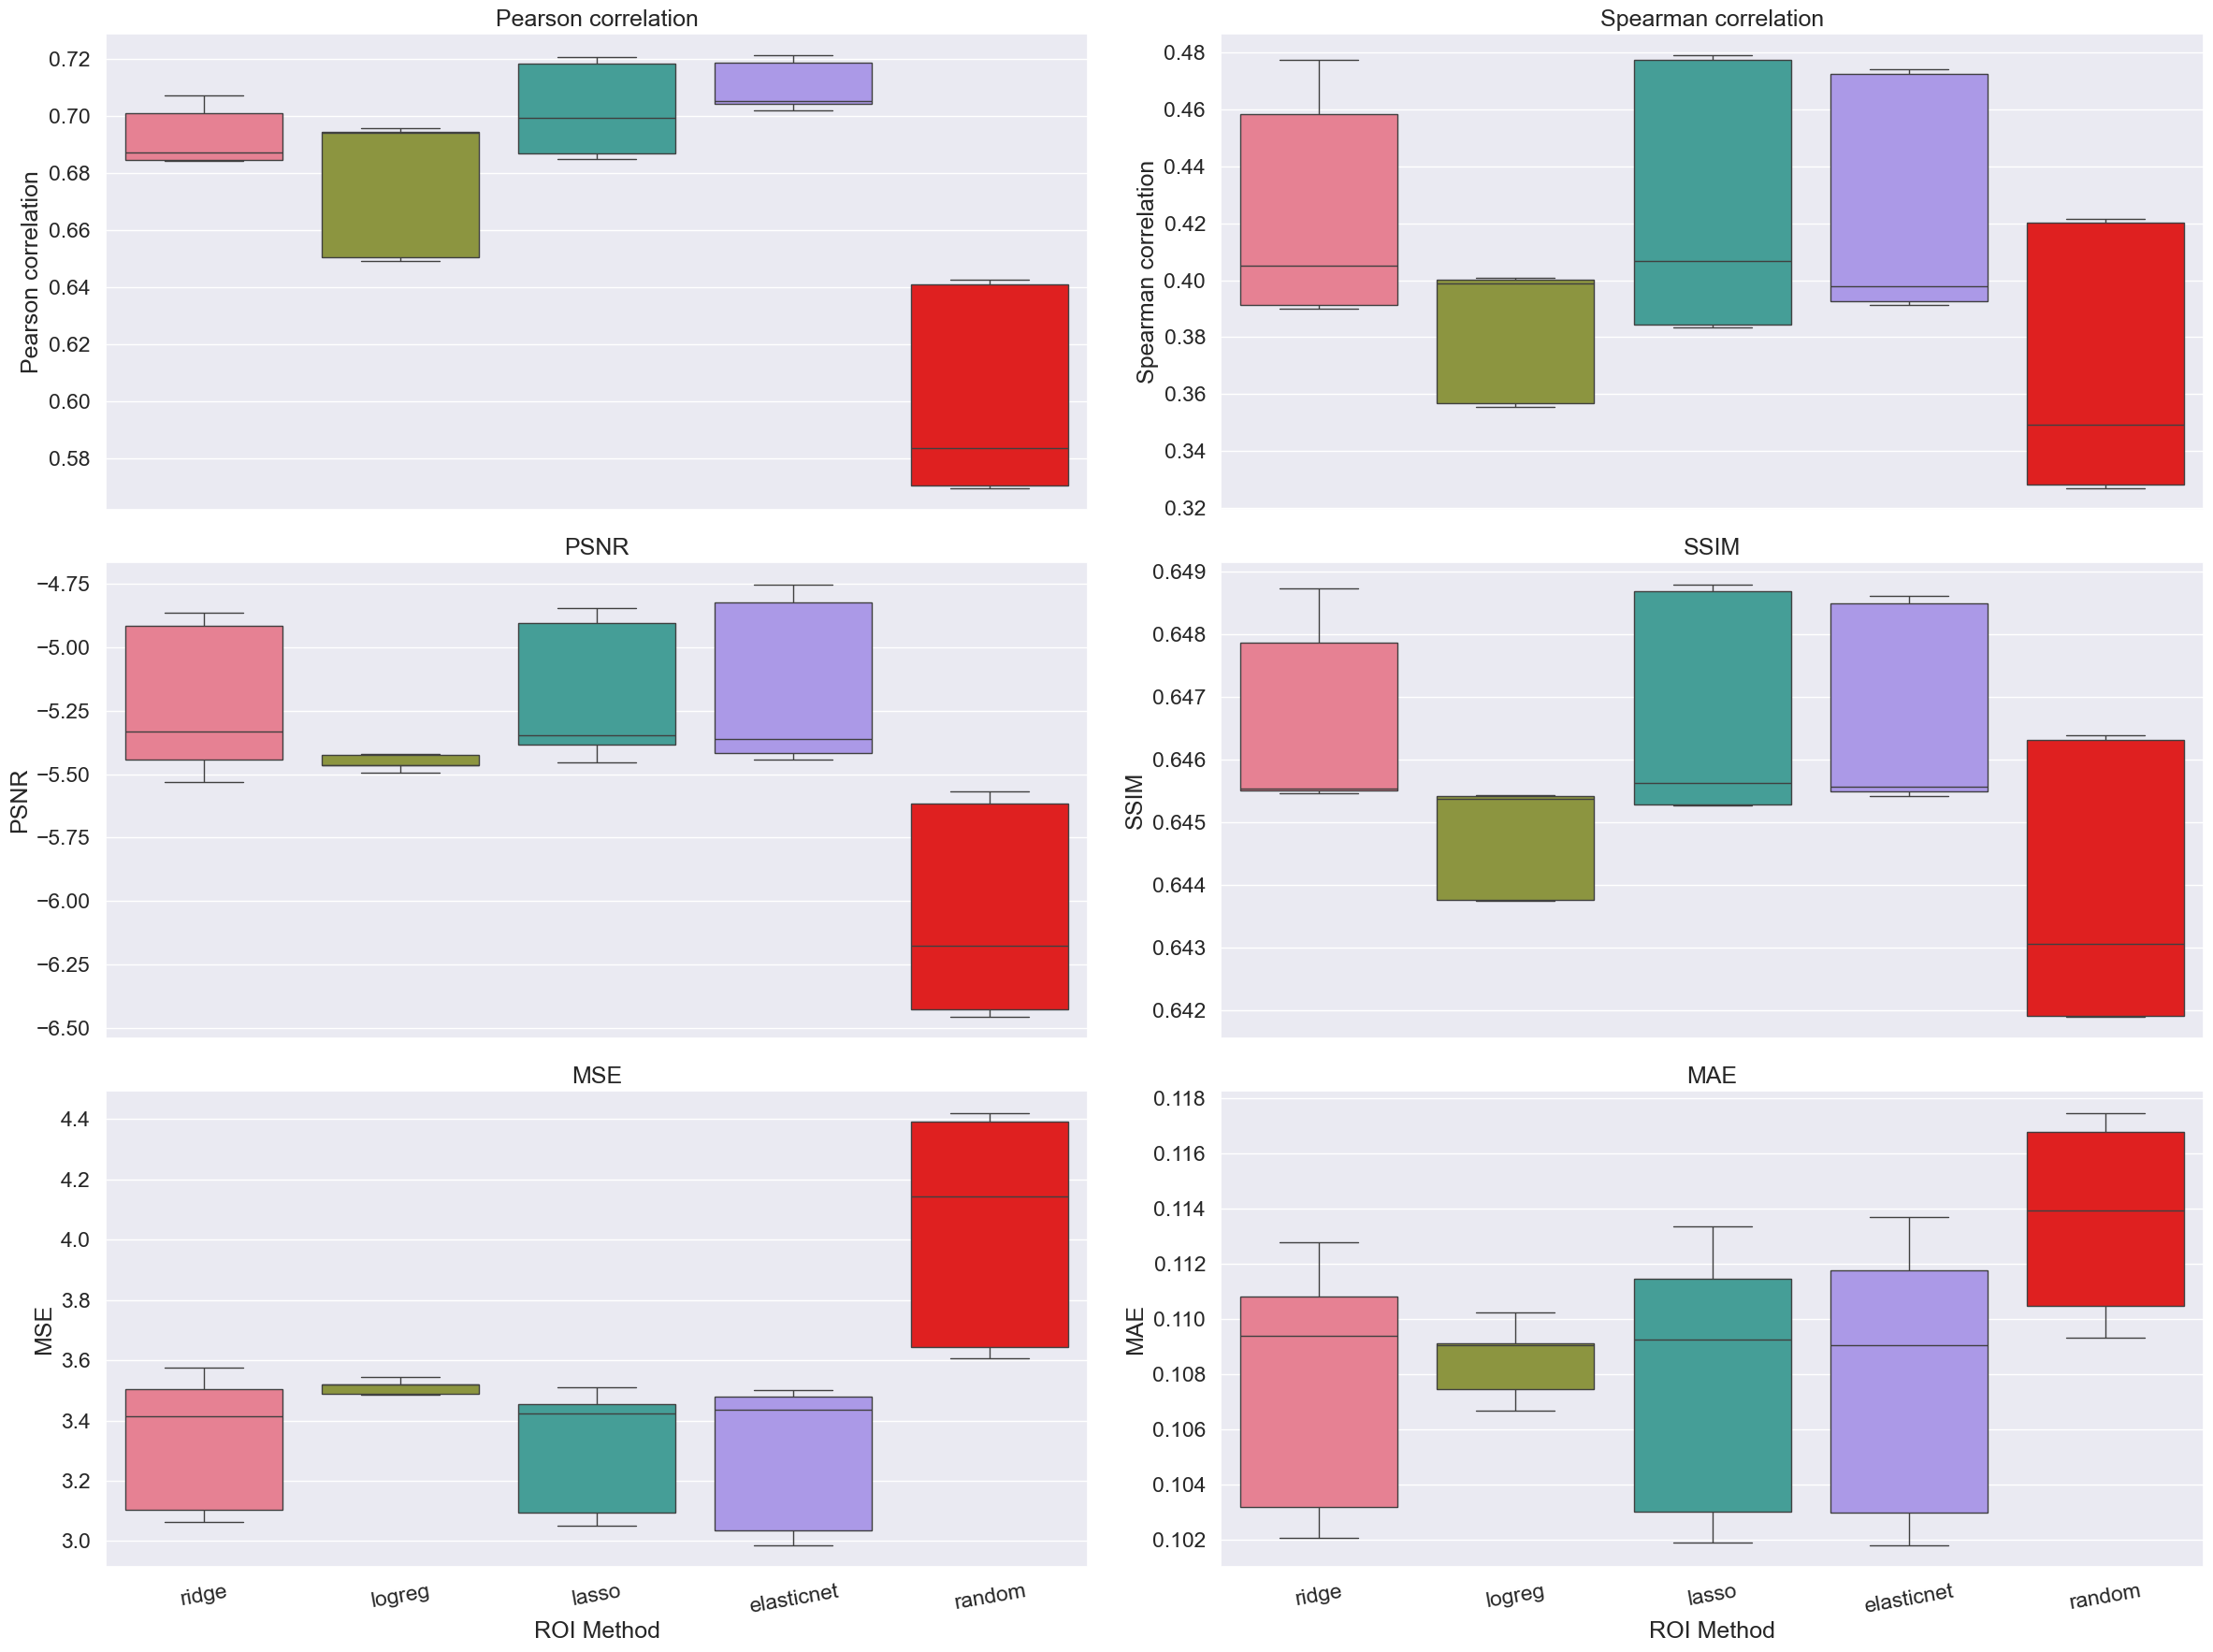

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/734805666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/734805666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/734805666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is d

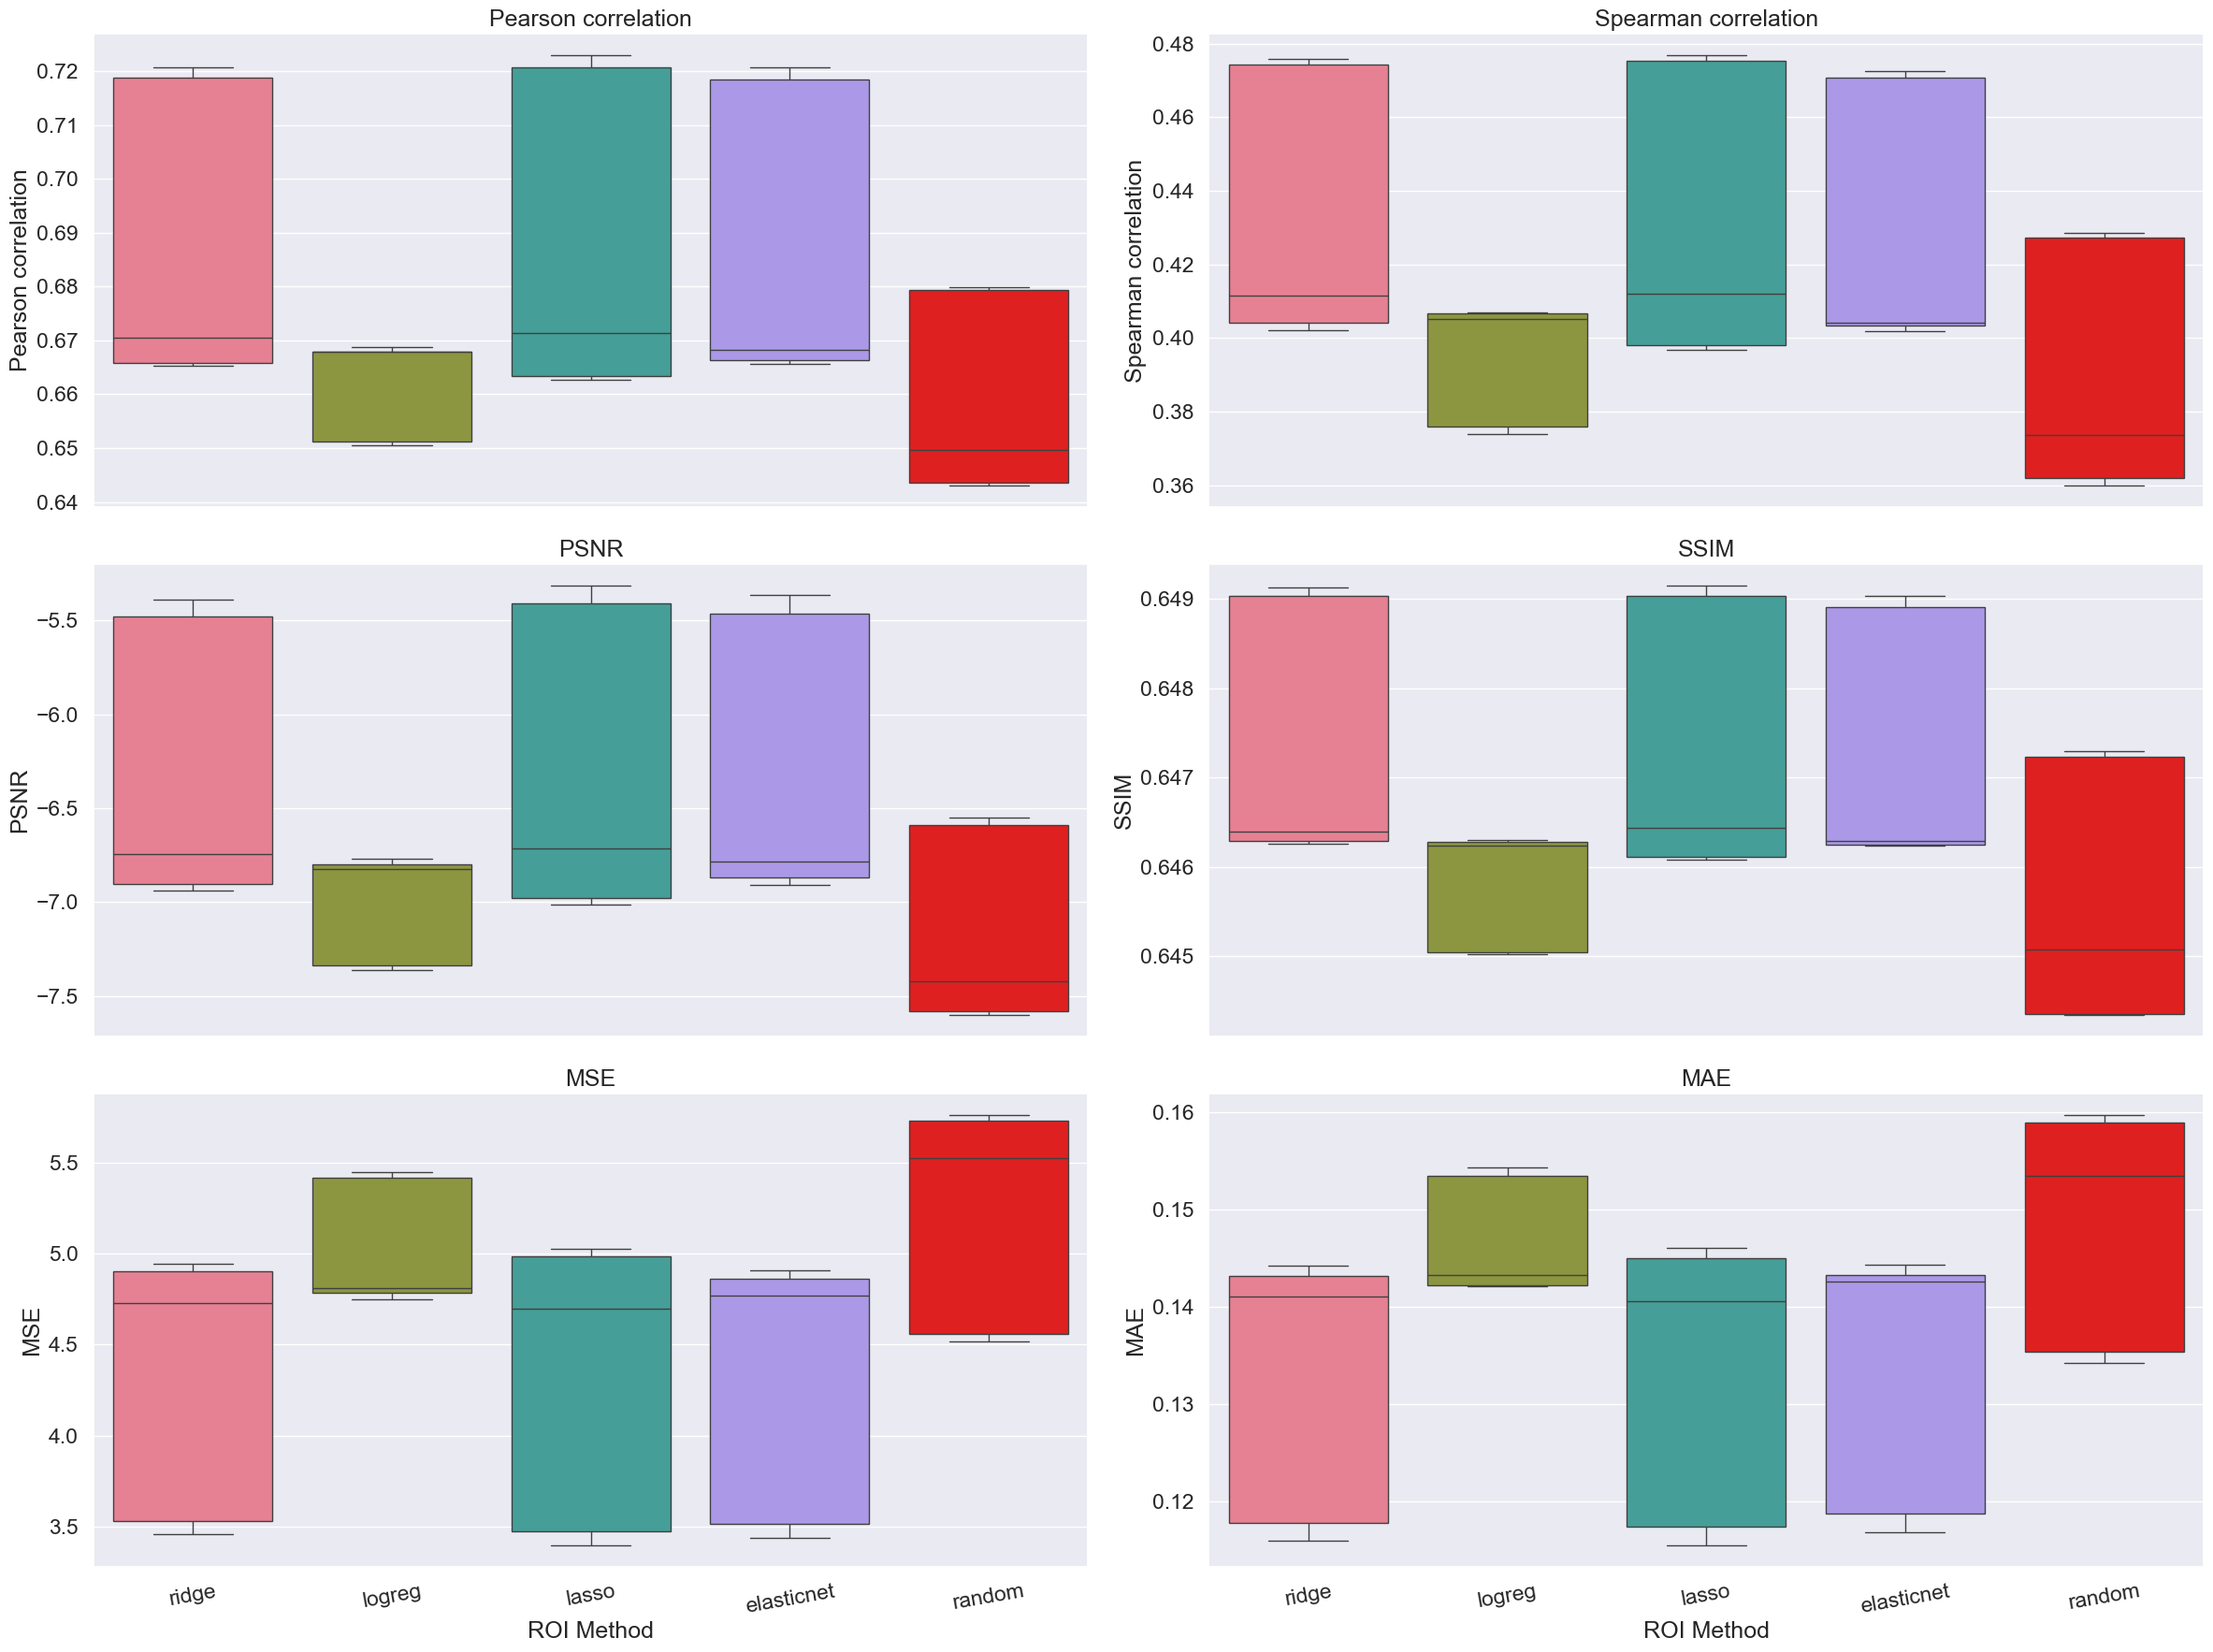

In [30]:
for approach in ['ROI HiCNN + Expected', 'ROI HiCNN + Lowres']:
    fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)

    ax = ax.flatten()
    for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
        sns.boxplot(data=df_with_roi[df_with_roi['Approach'] == approach], x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
        ax[i].set_title(f'{quality_measure[1]}')
        ax[i].set_ylabel(f'{quality_measure[1]}')
        ax[i].set_xlabel('ROI Method')
        ax[i].tick_params(axis='x', rotation=10)

    plt.tight_layout()
    plt.savefig(f'../figures/fig4/roi_quality_{approach.replace(" + ", "_").replace(" ", "_").lower()}.png', bbox_inches='tight')
    plt.show()

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/965750710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/965750710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/965750710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

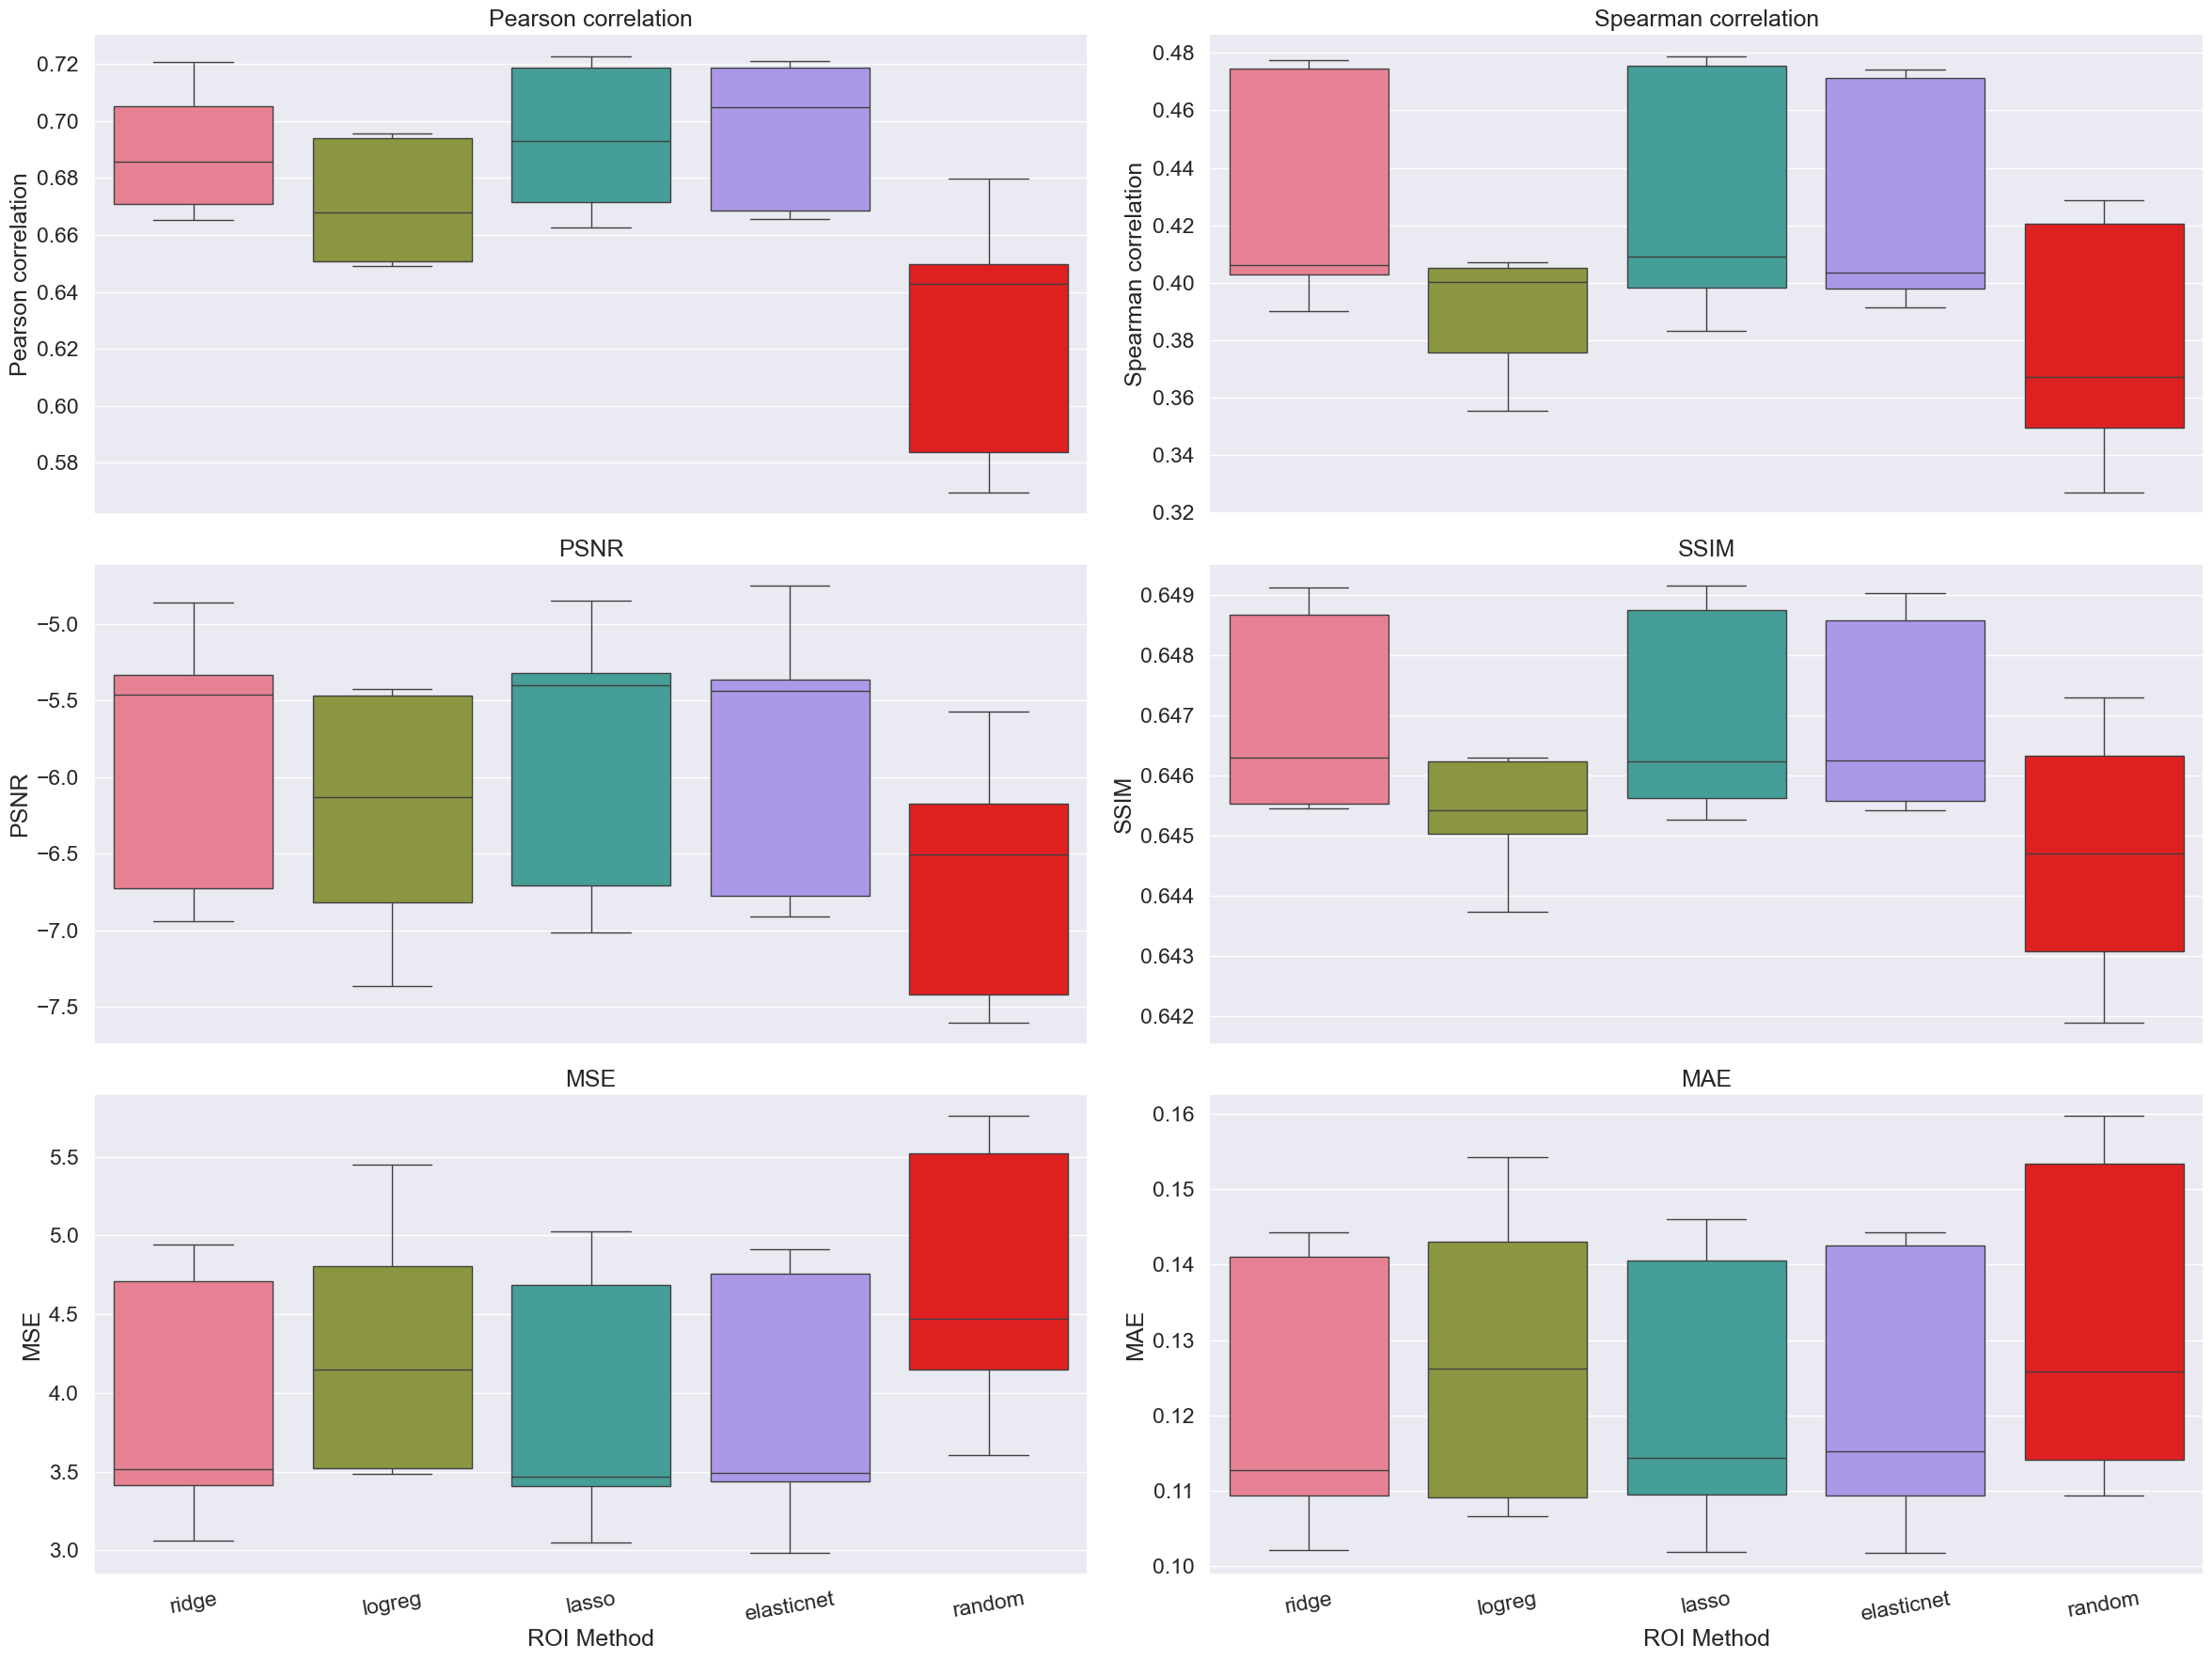

In [31]:
fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
    sns.boxplot(data=df_with_roi, x='ROI_METHOD', y=quality_measure[0], order=methods_ordered, palette=methods_colors, ax=ax[i])
    ax[i].set_title(f'{quality_measure[1]}')
    ax[i].set_ylabel(f'{quality_measure[1]}')
    ax[i].set_xlabel('ROI Method')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig4/roi_quality_agg.png', bbox_inches='tight')
plt.show()

## Fig 5: Impact of ROI sparsity on performance metrics

In [32]:
os.makedirs('../figures/fig5', exist_ok=True)

In [33]:
def adjust_color_brightness(color, sparsity):
    """Adjust color brightness based on sparsity with distinct light/dark ranges"""
    # Convert hex color to RGB
    r, g, b = to_rgb(color)
    
    # Make colors more distinct based on sparsity
    if sparsity < 0.25:
        # For low sparsity, make colors very light
        lightness = 0.9 - (sparsity * 3)  # Range from 0.9 to 0.35
        r = r * (1 - lightness) + 1 * lightness
        g = g * (1 - lightness) + 1 * lightness
        b = b * (1 - lightness) + 1 * lightness
    else:
        # For high sparsity, make colors very dark
        darkness = 0.7 * (sparsity - 0.25) / 0.75  # Range from 0 to 0.7
        r = r * (1 - darkness)
        g = g * (1 - darkness)
        b = b * (1 - darkness)
    
    # Ensure values stay within 0-1 range
    r = min(1, max(0, r))
    g = min(1, max(0, g))
    b = min(1, max(0, b))
    
    return (r, g, b)


In [34]:
sparsities = np.unique(df['ROI_SPARSITY'])

base_blue = "#44A0E6"  # Light blue hex code

sparsities_colors = []
for sparsity in sparsities:
    adjusted_color = adjust_color_brightness(base_blue, sparsity)
    sparsities_colors.append(to_hex(adjusted_color))

In [35]:
df_without_random_with_roi = df_without_random[df_without_random['USE_ROI'] == 1]


/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3279519182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi, x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3279519182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi, x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])


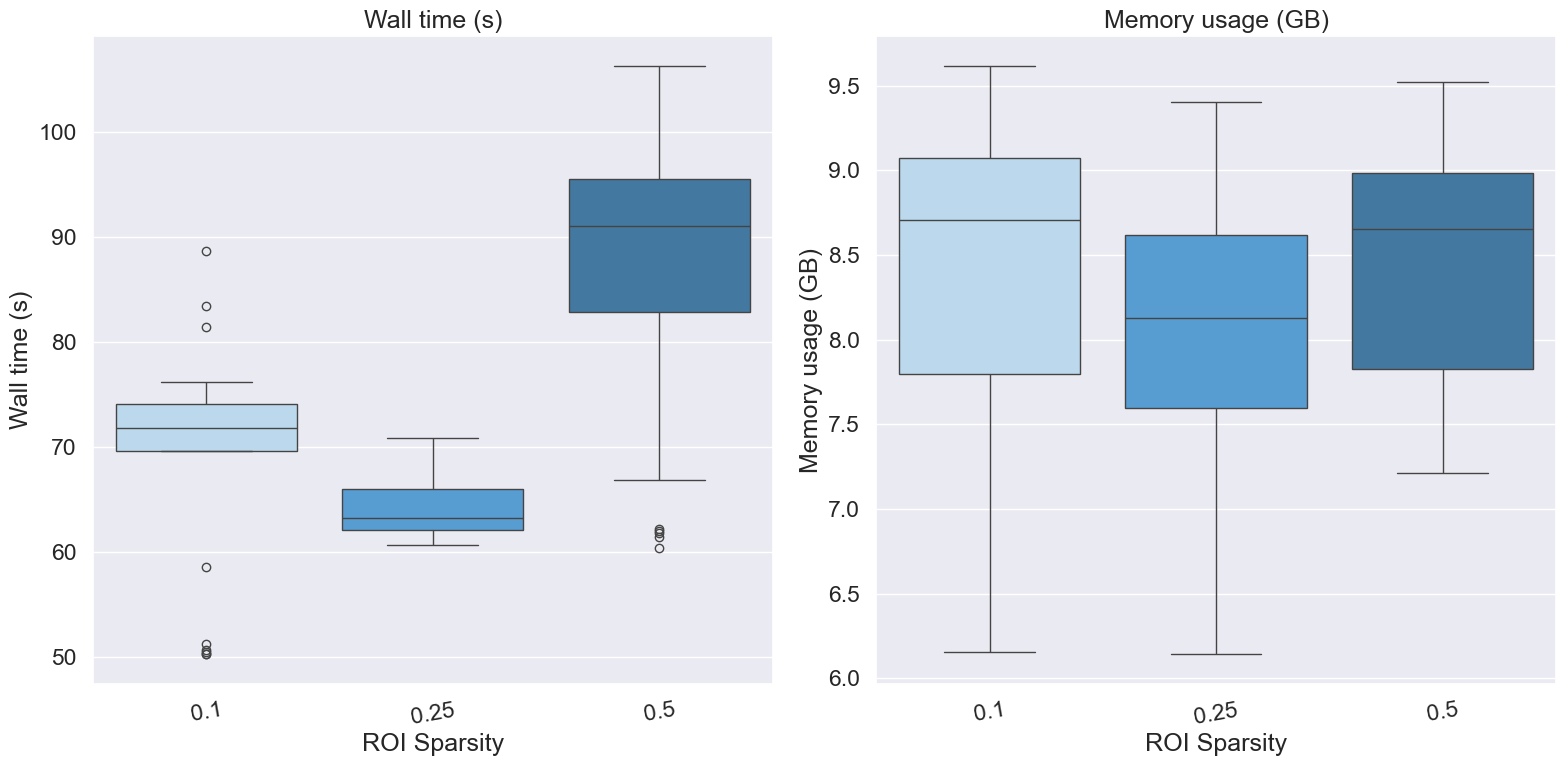

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3279519182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3279519182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])


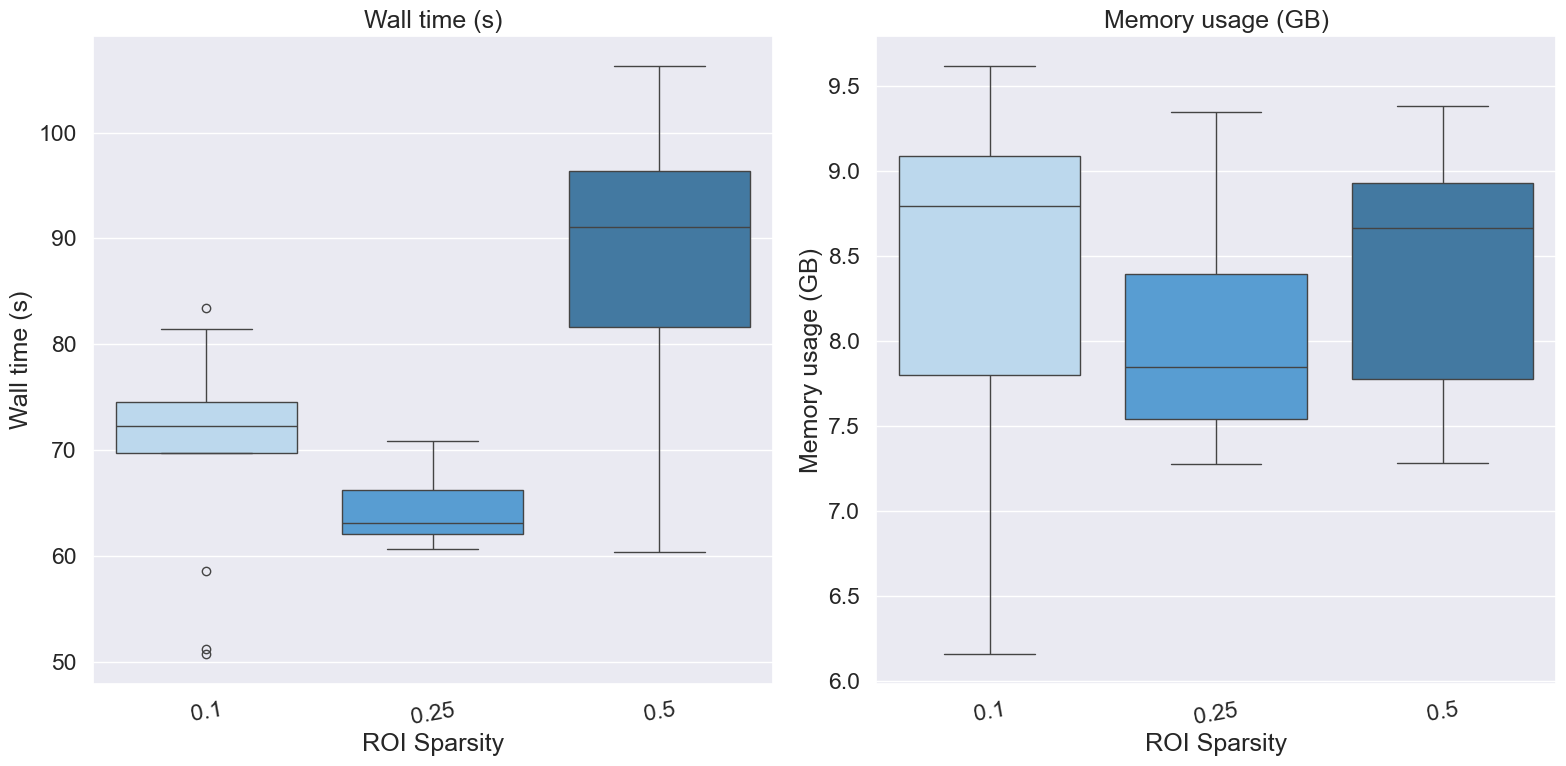

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3279519182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3279519182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])


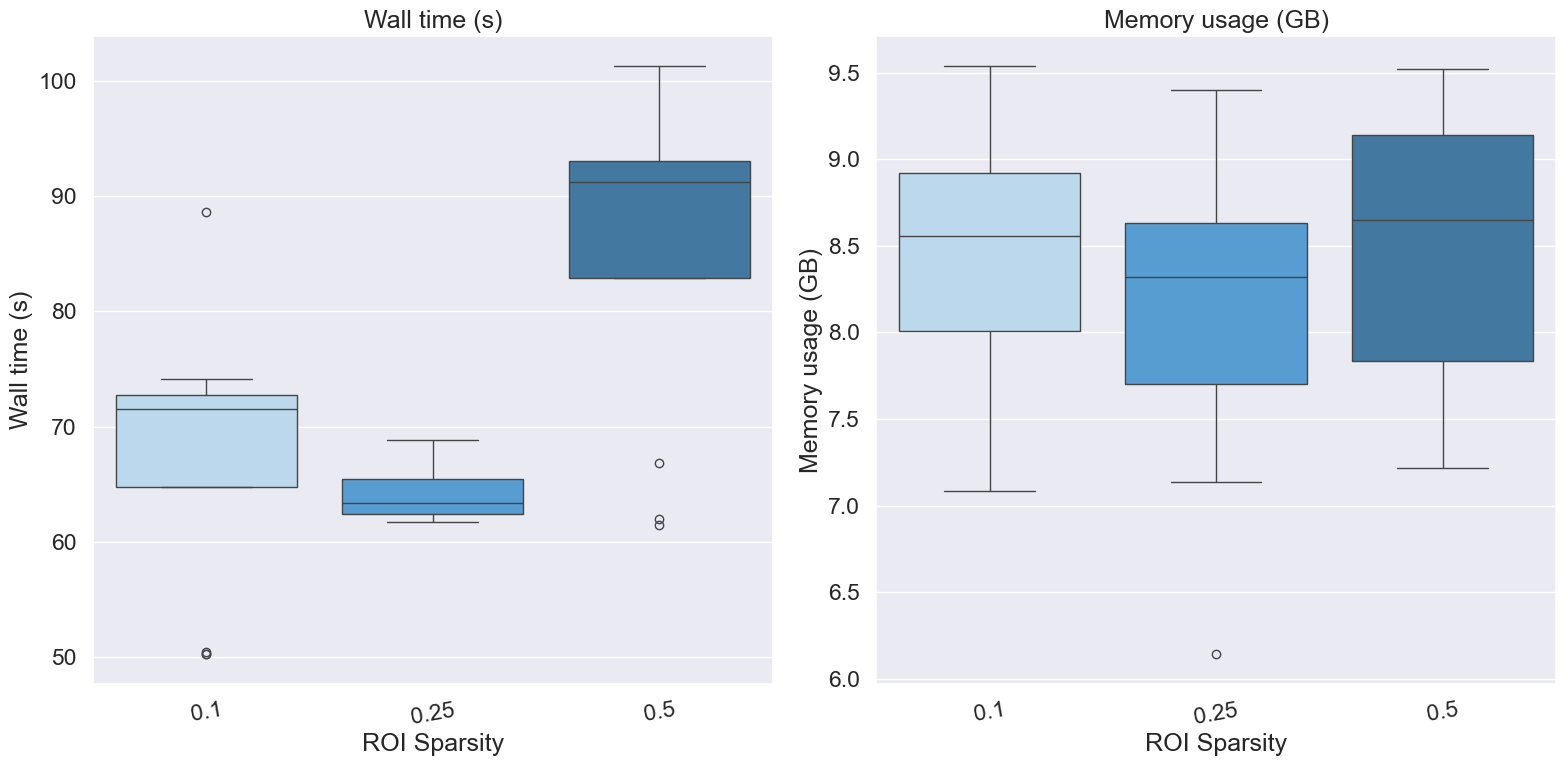

In [36]:
# aggregated
fig, ax = plt.subplots(1,2, figsize=(16, 8), sharex=True)
ax = ax.flatten()
for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    sns.boxplot(data=df_without_random_with_roi, x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
    ax[i].set_title(f'{performance_metric[1]}')
    ax[i].set_ylabel(f'{performance_metric[1]}')
    ax[i].set_xlabel('ROI Sparsity')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig5/roi_performance_sparsity_agg.png', bbox_inches='tight')
plt.show()



for approach in ['ROI HiCNN + Expected', 'ROI HiCNN + Lowres']:
    fig, ax = plt.subplots(1,2, figsize=(16, 8), sharex=True)
    ax = ax.flatten()
    for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
        sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=performance_metric[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
        ax[i].set_title(f'{performance_metric[1]}')
        ax[i].set_ylabel(f'{performance_metric[1]}')
        ax[i].set_xlabel('ROI Sparsity')
        ax[i].tick_params(axis='x', rotation=10)

    plt.tight_layout()
    plt.savefig(f'../figures/fig5/roi_performance_sparsity_{approach.replace(" + ", "_").replace(" ", "_").lower()}.png', bbox_inches='tight')
    plt.show()

In [37]:
# split across roi methods
df_with_roi = df_with_roi.assign(method_sparsity=df_with_roi['ROI_METHOD'] + '_' + df_with_roi['ROI_SPARSITY'].astype(str))

In [38]:
methods_colors_dict = dict(zip(methods_ordered, methods_colors))
ordered_methods_sparsities = np.array([mo + '_' + str(sp) for mo in methods_ordered  for sp in sparsities ])
methods_sparsities_colors = []
for ms in ordered_methods_sparsities:
    method = ms.split('_')[0]
    sparsity = float(ms.split('_')[1])
    base_color = methods_colors_dict[method]
    adjusted_color = adjust_color_brightness(base_color, sparsity)
    methods_sparsities_colors.append(adjusted_color)

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3154833424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='method_sparsity', y=performance_metric[0],
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3154833424.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=0)
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/3154833424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='method_sparsity', y=performance_metric[0],
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_

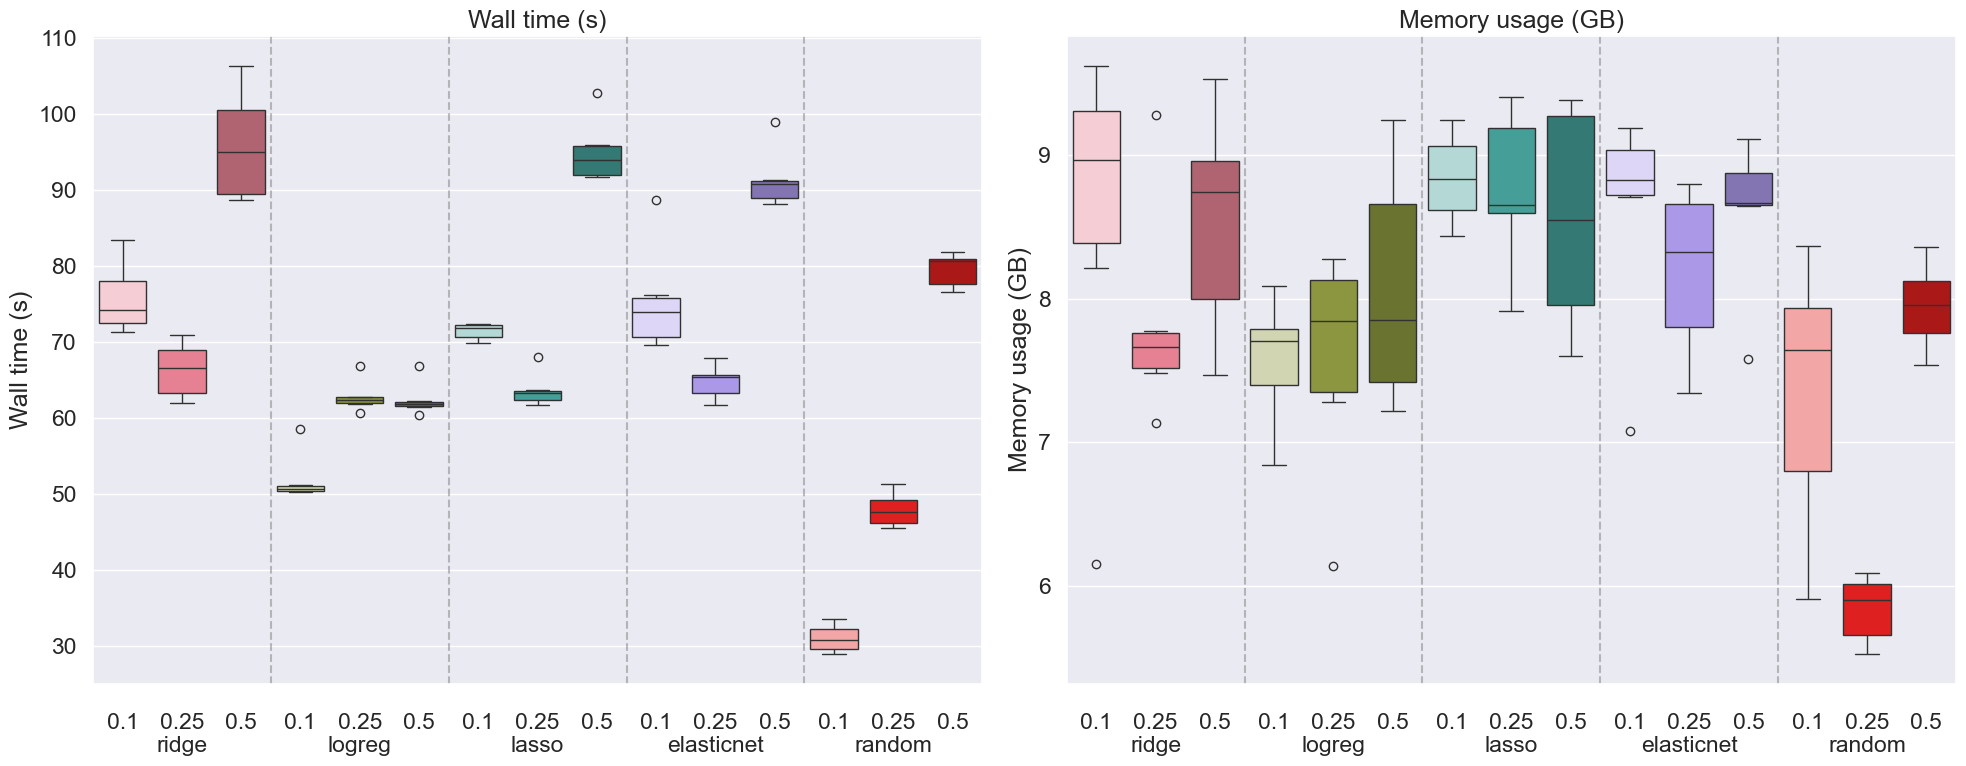

In [39]:
# aggregated
fig, ax = plt.subplots(1,2, figsize=(20, 8), sharex=True)


# Plot
for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    sns.boxplot(data=df_with_roi, x='method_sparsity', y=performance_metric[0], 
                order=ordered_methods_sparsities, palette=methods_sparsities_colors, ax=ax[i])
    
    # Add vertical lines between methods
    current_method = None
    for j, method_sparsity in enumerate(ordered_methods_sparsities):
        method = method_sparsity.split('_')[0]
        if method != current_method:
            if current_method is not None:
                ax[i].axvline(j - 0.5, color='gray', linestyle='--', alpha=0.5)
            current_method = method

    # Set titles and labels
    ax[i].set_title(f'{performance_metric[1]}')
    ax[i].set_ylabel(f'{performance_metric[1]}')
    ax[i].set_xlabel('')
    
    # Create tiered xticks
    labels = []
    for method_sparsity in ordered_methods_sparsities:
        method, sparsity = method_sparsity.split('_')
        if sparsity=="0.25":
            labels.append(f"{sparsity}\n{method}")
            current_method = method
        else:
            labels.append(f"{sparsity}")
    ax[i].set_xticklabels(labels, rotation=0)
    ax[i].tick_params(axis='x', which='major', pad=15)

plt.tight_layout()
plt.savefig('../figures/fig5/roi_performance_method_sparsity.png', bbox_inches='tight')
plt.show()

## Fig 6: Impact of ROI sparsity on quality metrics

In [40]:
os.makedirs('../figures/fig6', exist_ok=True)

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi, x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi, x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

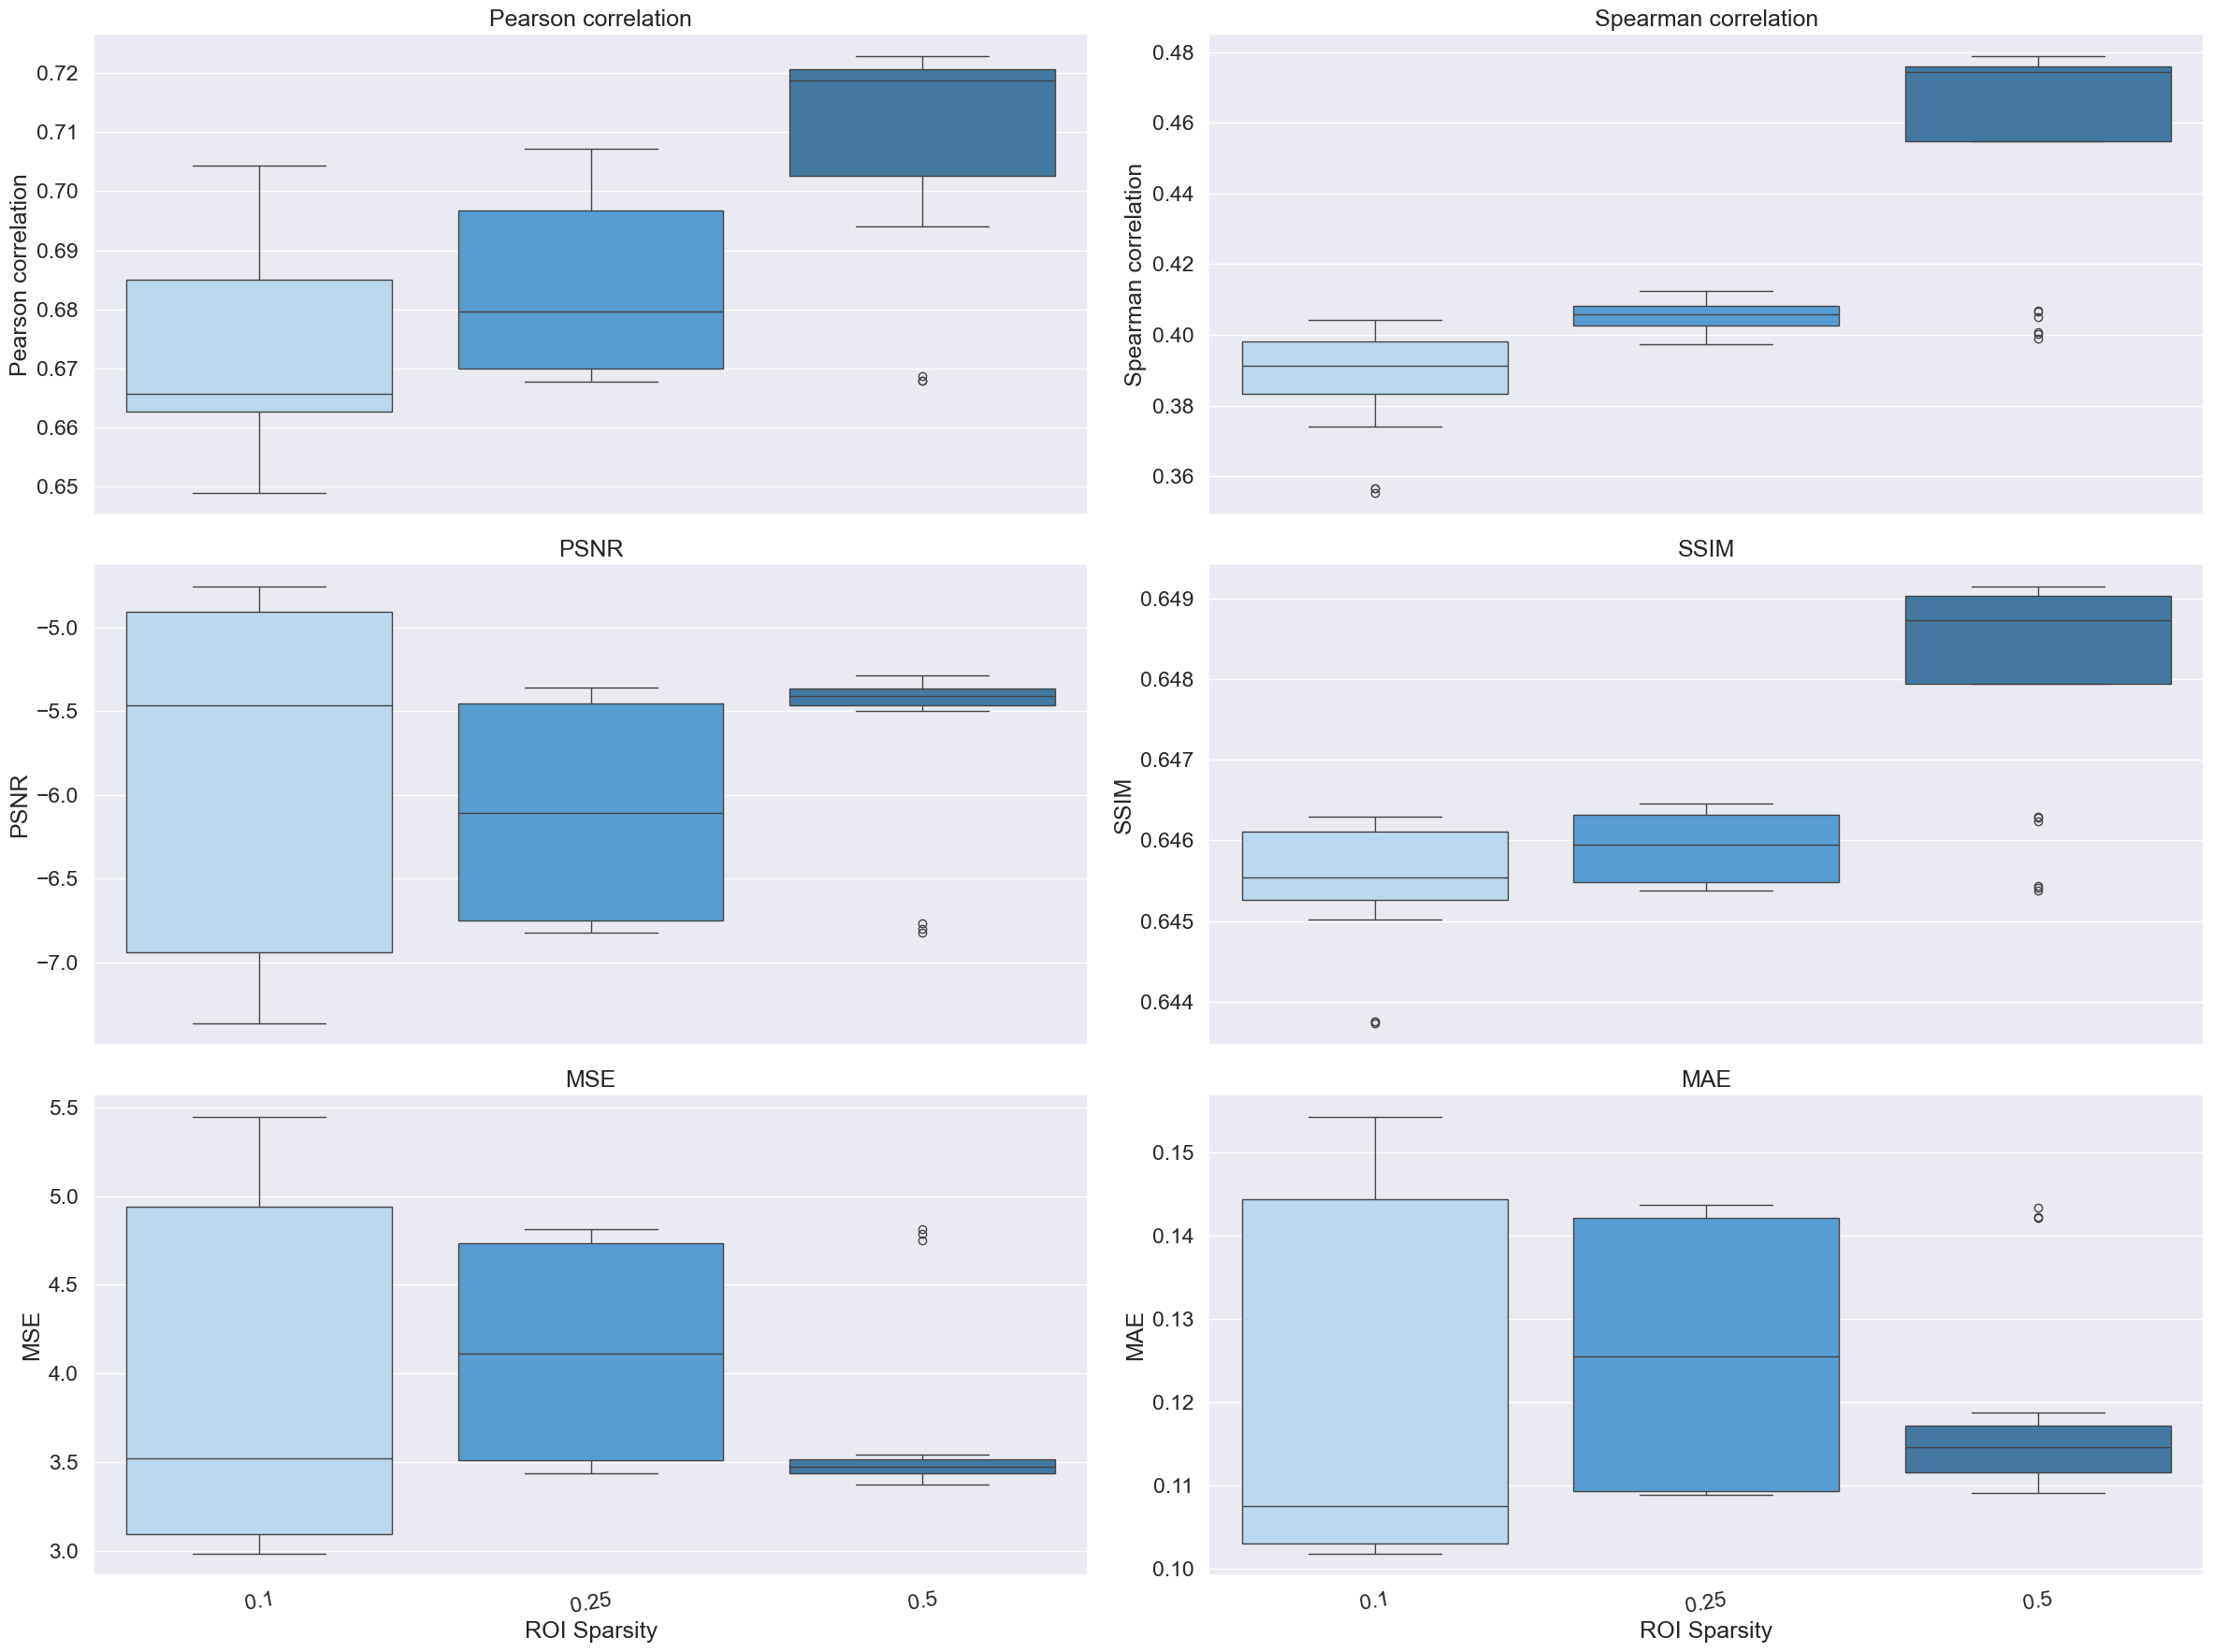

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:2

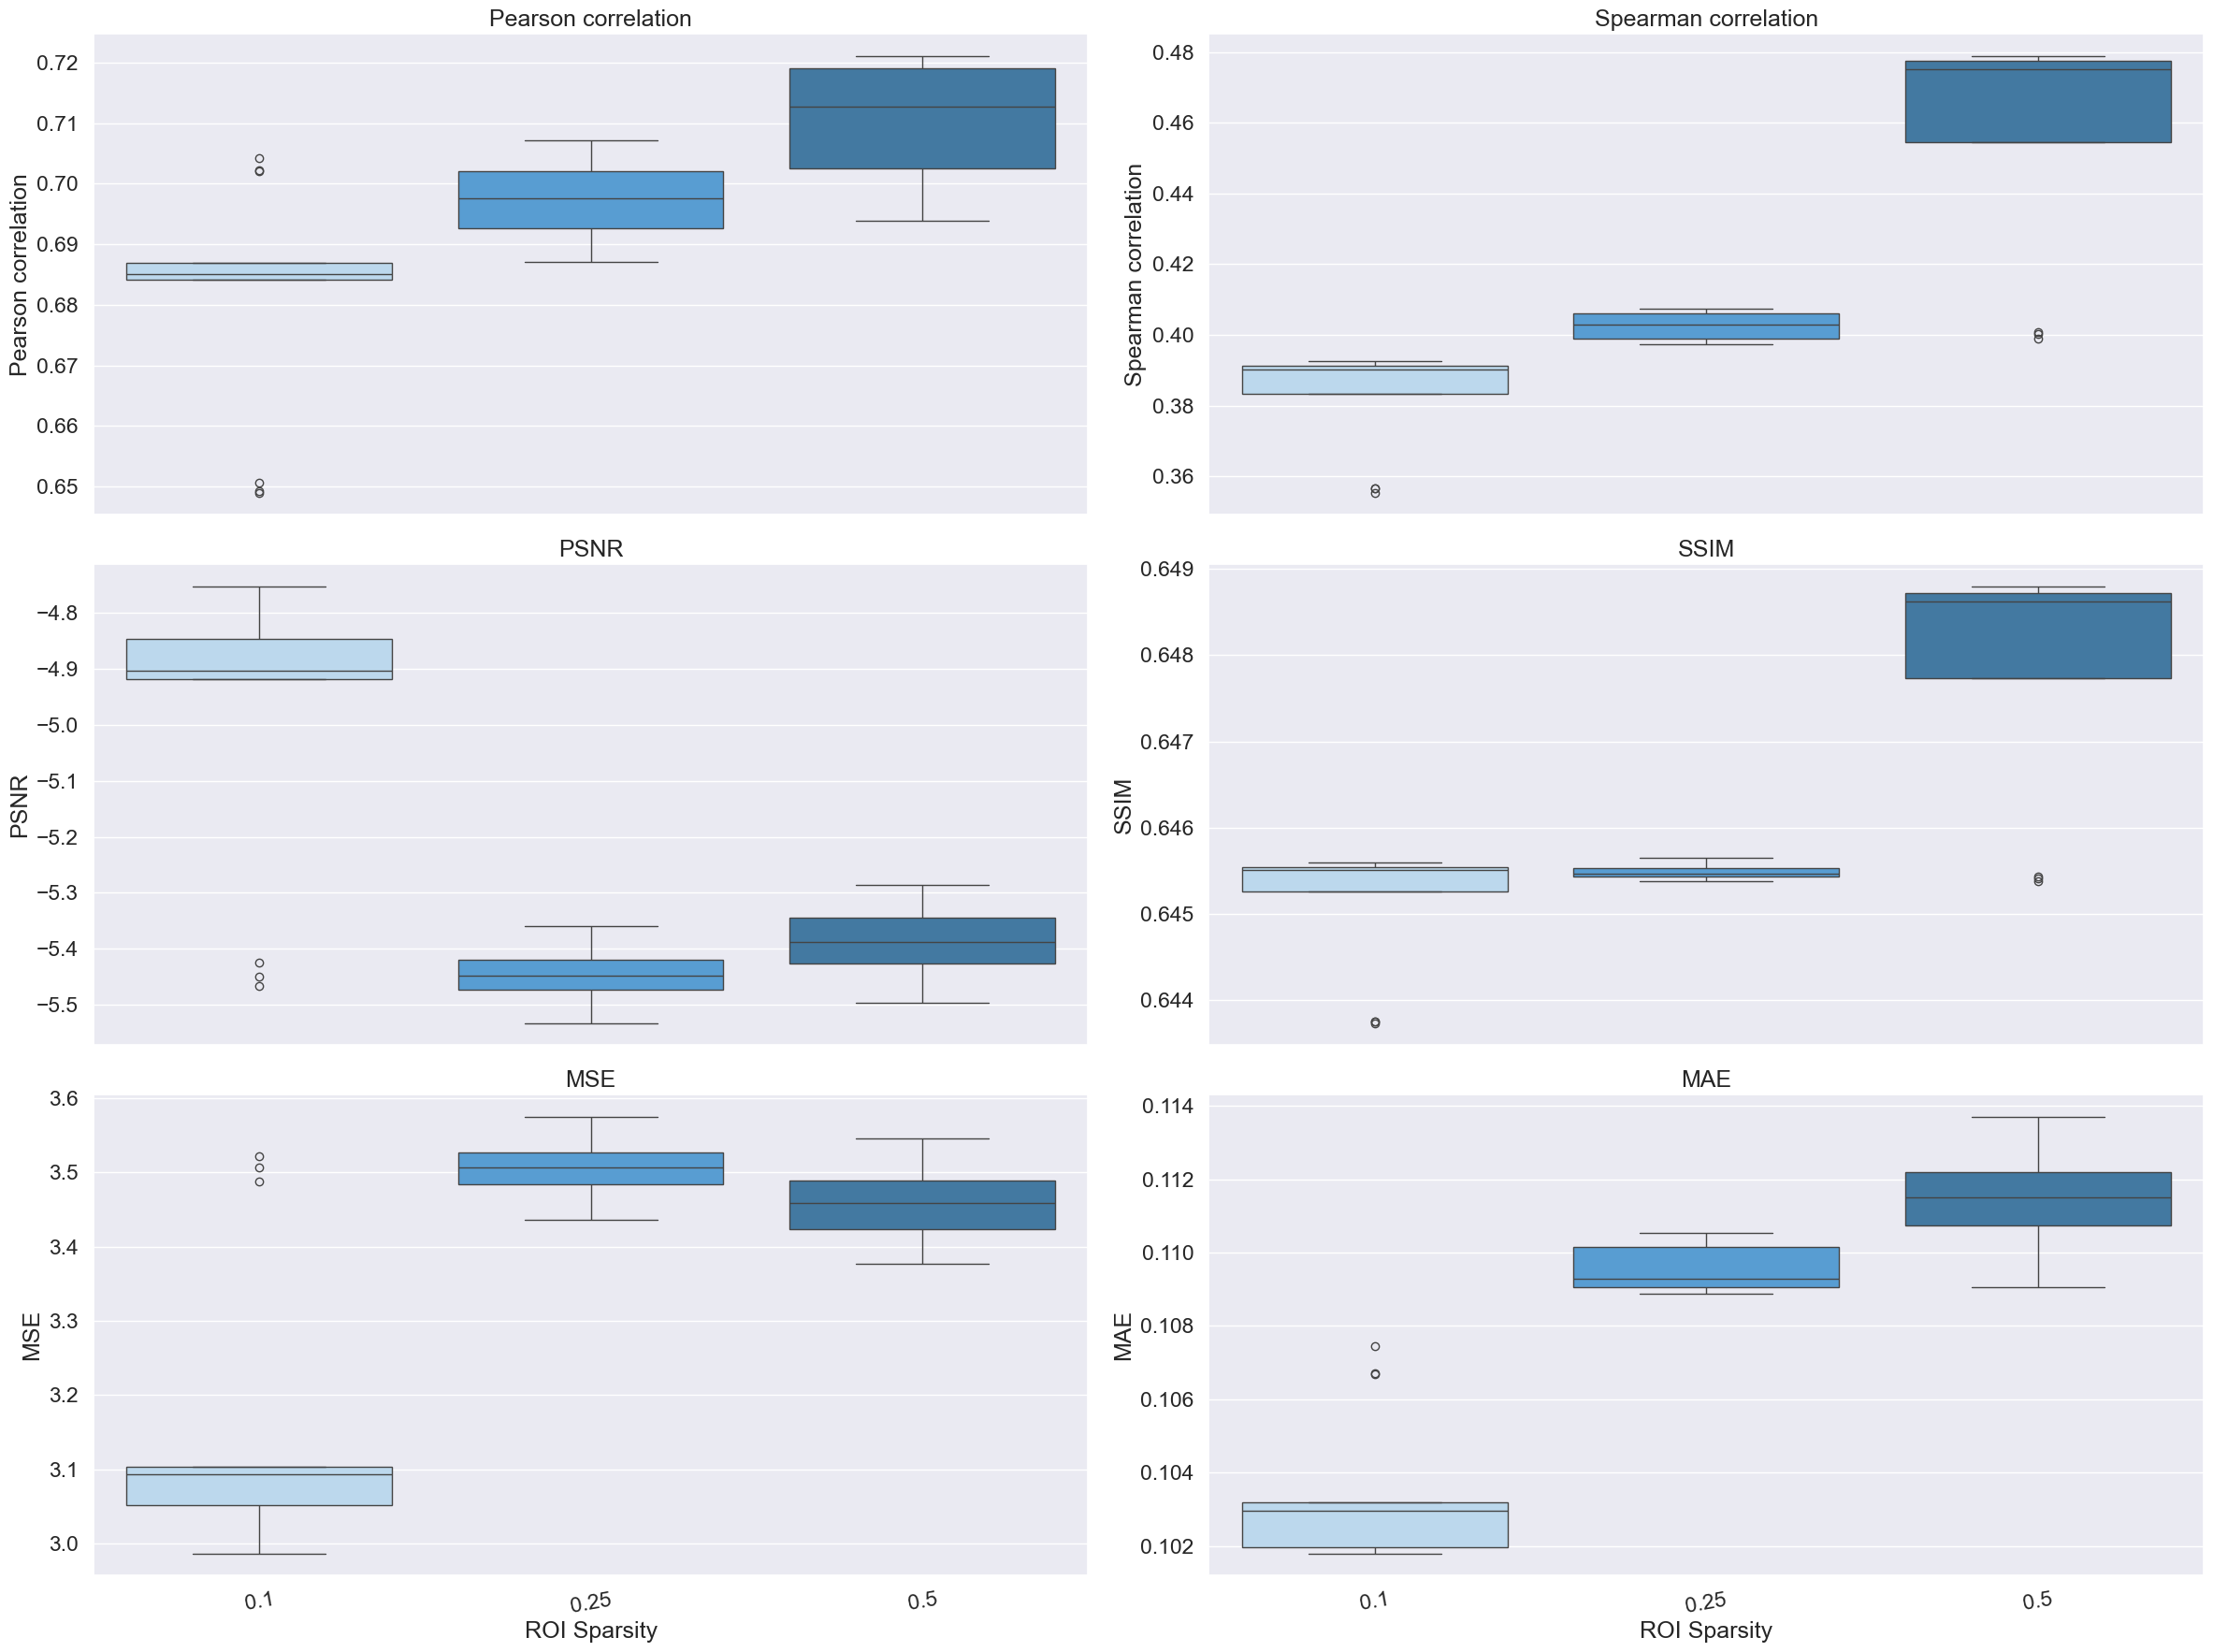

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/1390128566.py:2

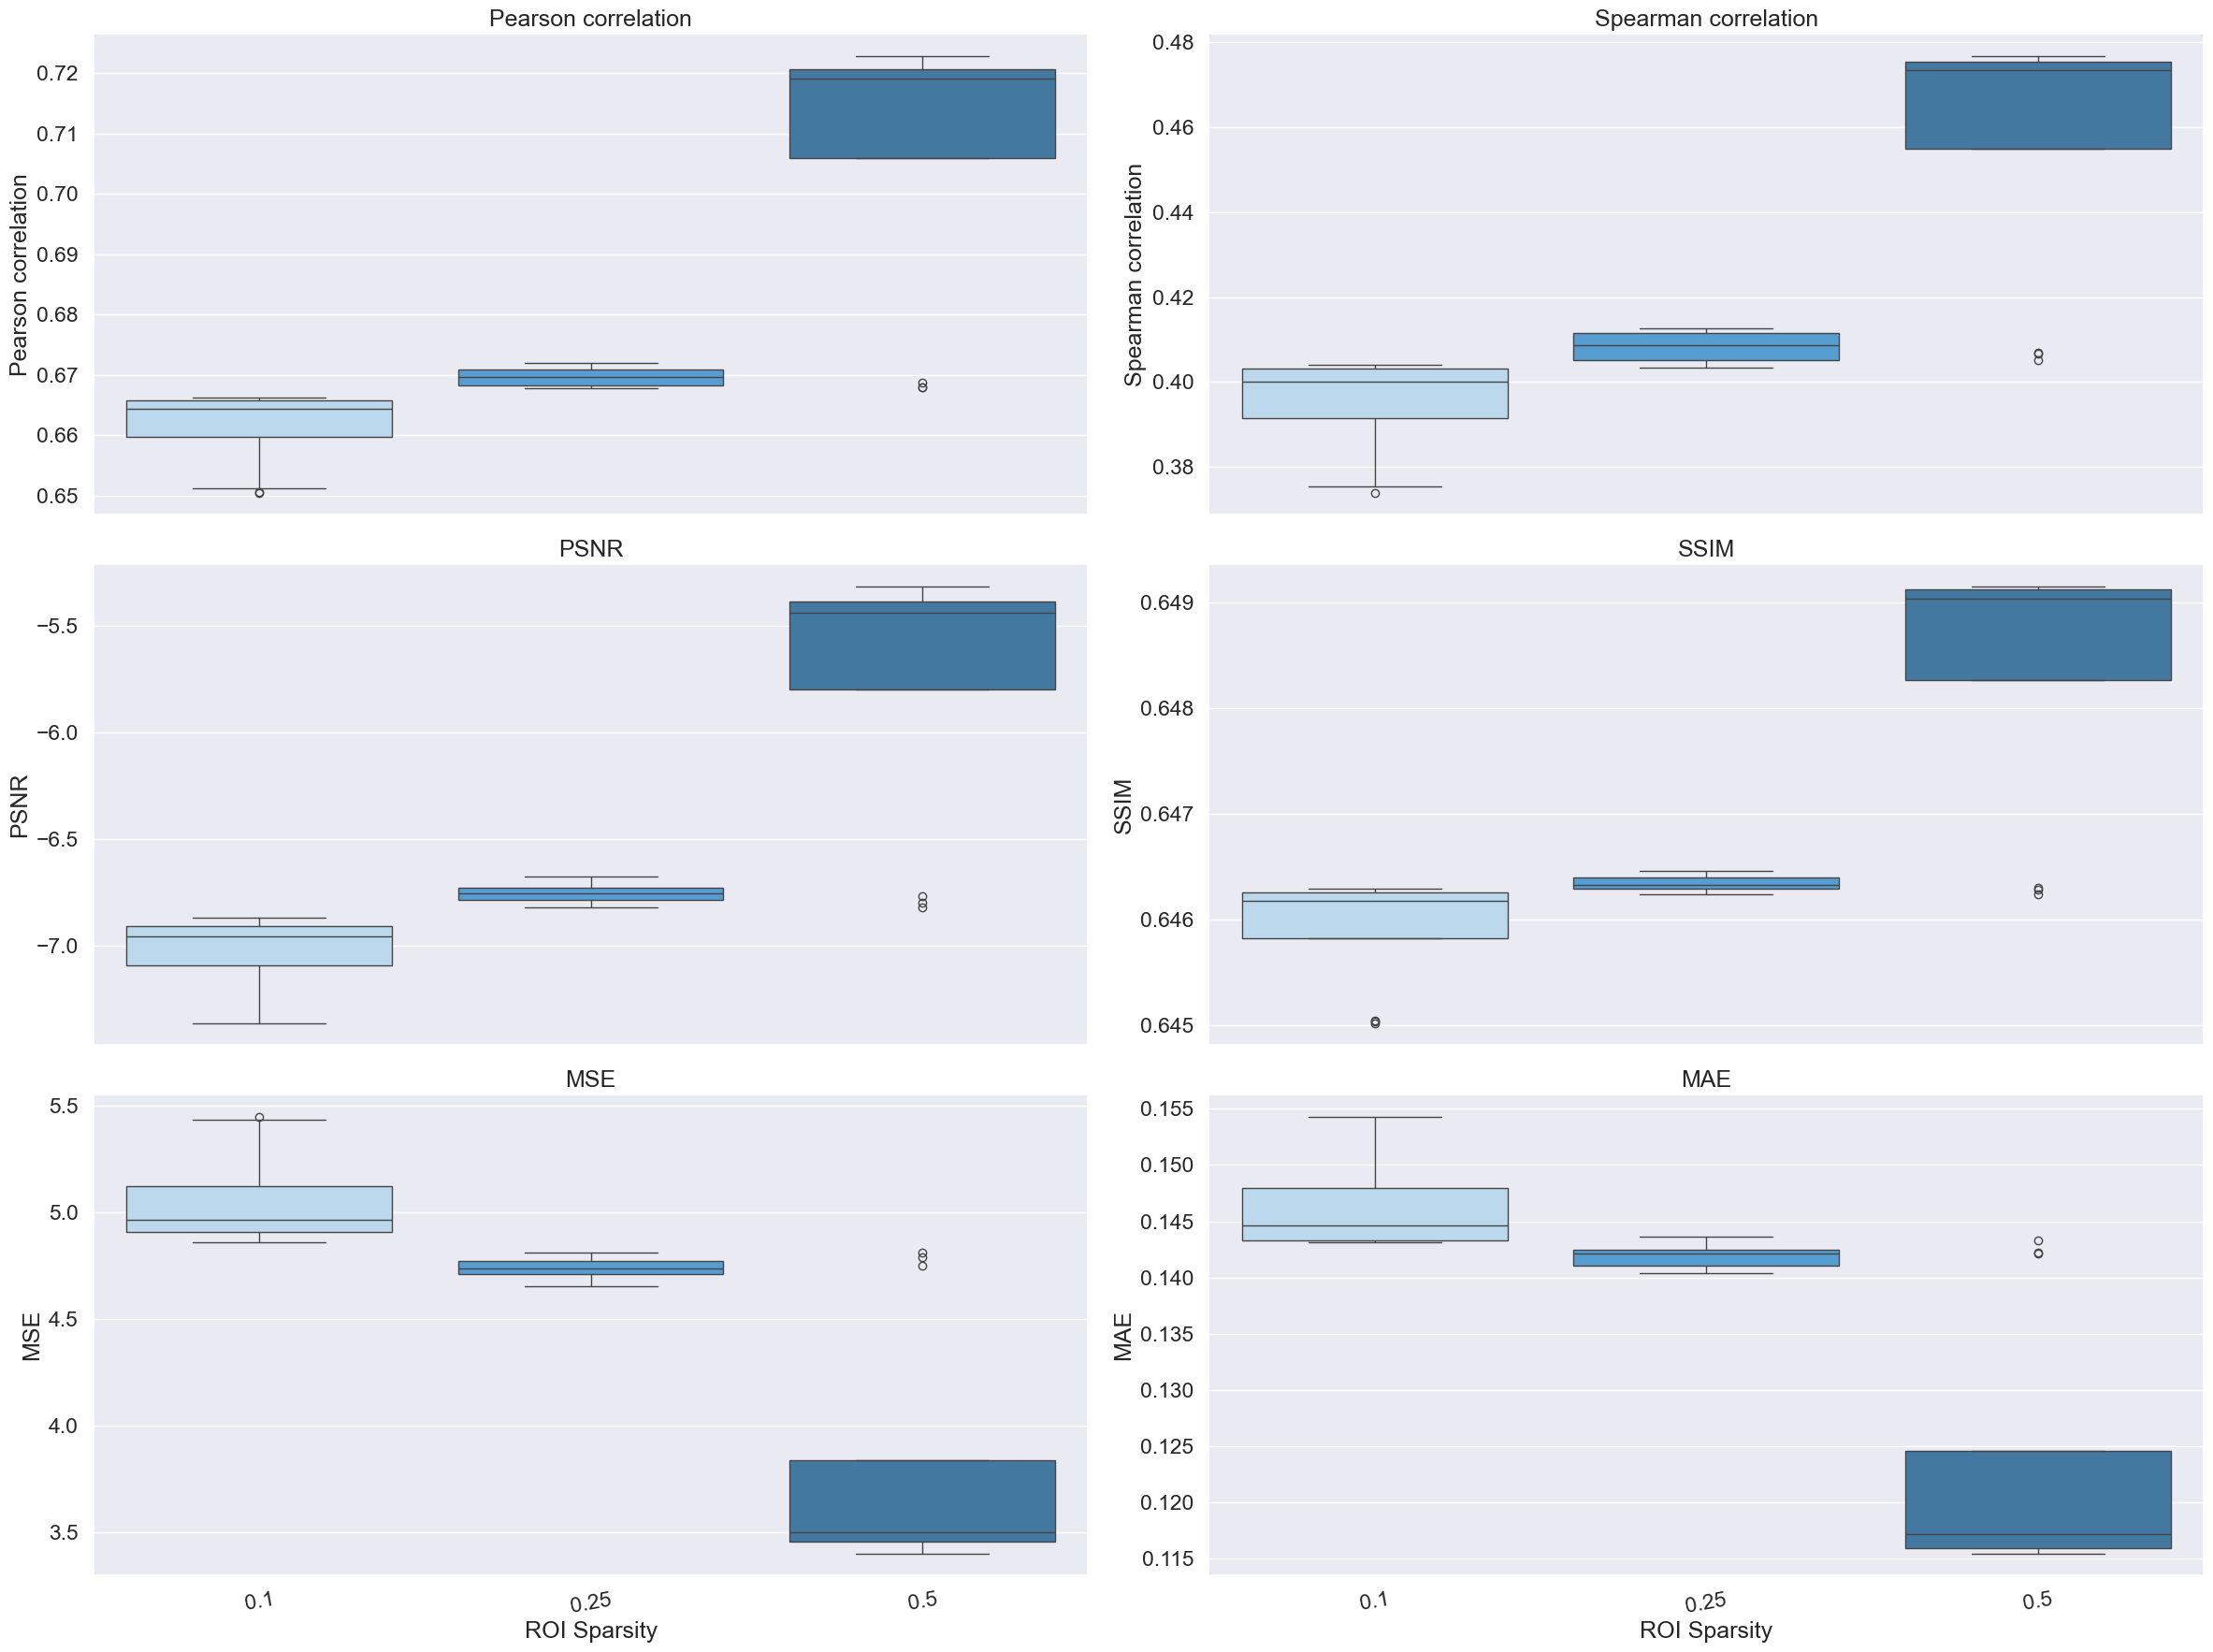

In [41]:
# aggregated
fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
ax = ax.flatten()
for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
    sns.boxplot(data=df_without_random_with_roi, x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
    ax[i].set_title(f'{quality_measure[1]}')
    ax[i].set_ylabel(f'{quality_measure[1]}')
    ax[i].set_xlabel('ROI Sparsity')
    ax[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('../figures/fig6/roi_quality_sparsity_agg.png', bbox_inches='tight')
plt.show()



for approach in ['ROI HiCNN + Expected', 'ROI HiCNN + Lowres']:
    fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
    ax = ax.flatten()
    for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
        sns.boxplot(data=df_without_random_with_roi[df_without_random_with_roi['Approach'] == approach], x='ROI_SPARSITY', y=quality_measure[0], order=sparsities, palette=sparsities_colors, ax=ax[i])
        ax[i].set_title(f'{quality_measure[1]}')
        ax[i].set_ylabel(f'{quality_measure[1]}')
        ax[i].set_xlabel('ROI Sparsity')
        ax[i].tick_params(axis='x', rotation=10)

    plt.tight_layout()
    plt.savefig(f'../figures/fig6/roi_quality_sparsity_{approach.replace(" + ", "_").replace(" ", "_").lower()}.png', bbox_inches='tight')
    plt.show()

/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/2016213929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='method_sparsity', y=quality_measure[0],
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/2016213929.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=0)
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/2016213929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_roi, x='method_sparsity', y=quality_measure[0],
/var/folders/04/c1jkmygs46nbsgjb2y318mnw0000gn/T/ipykernel_95257/

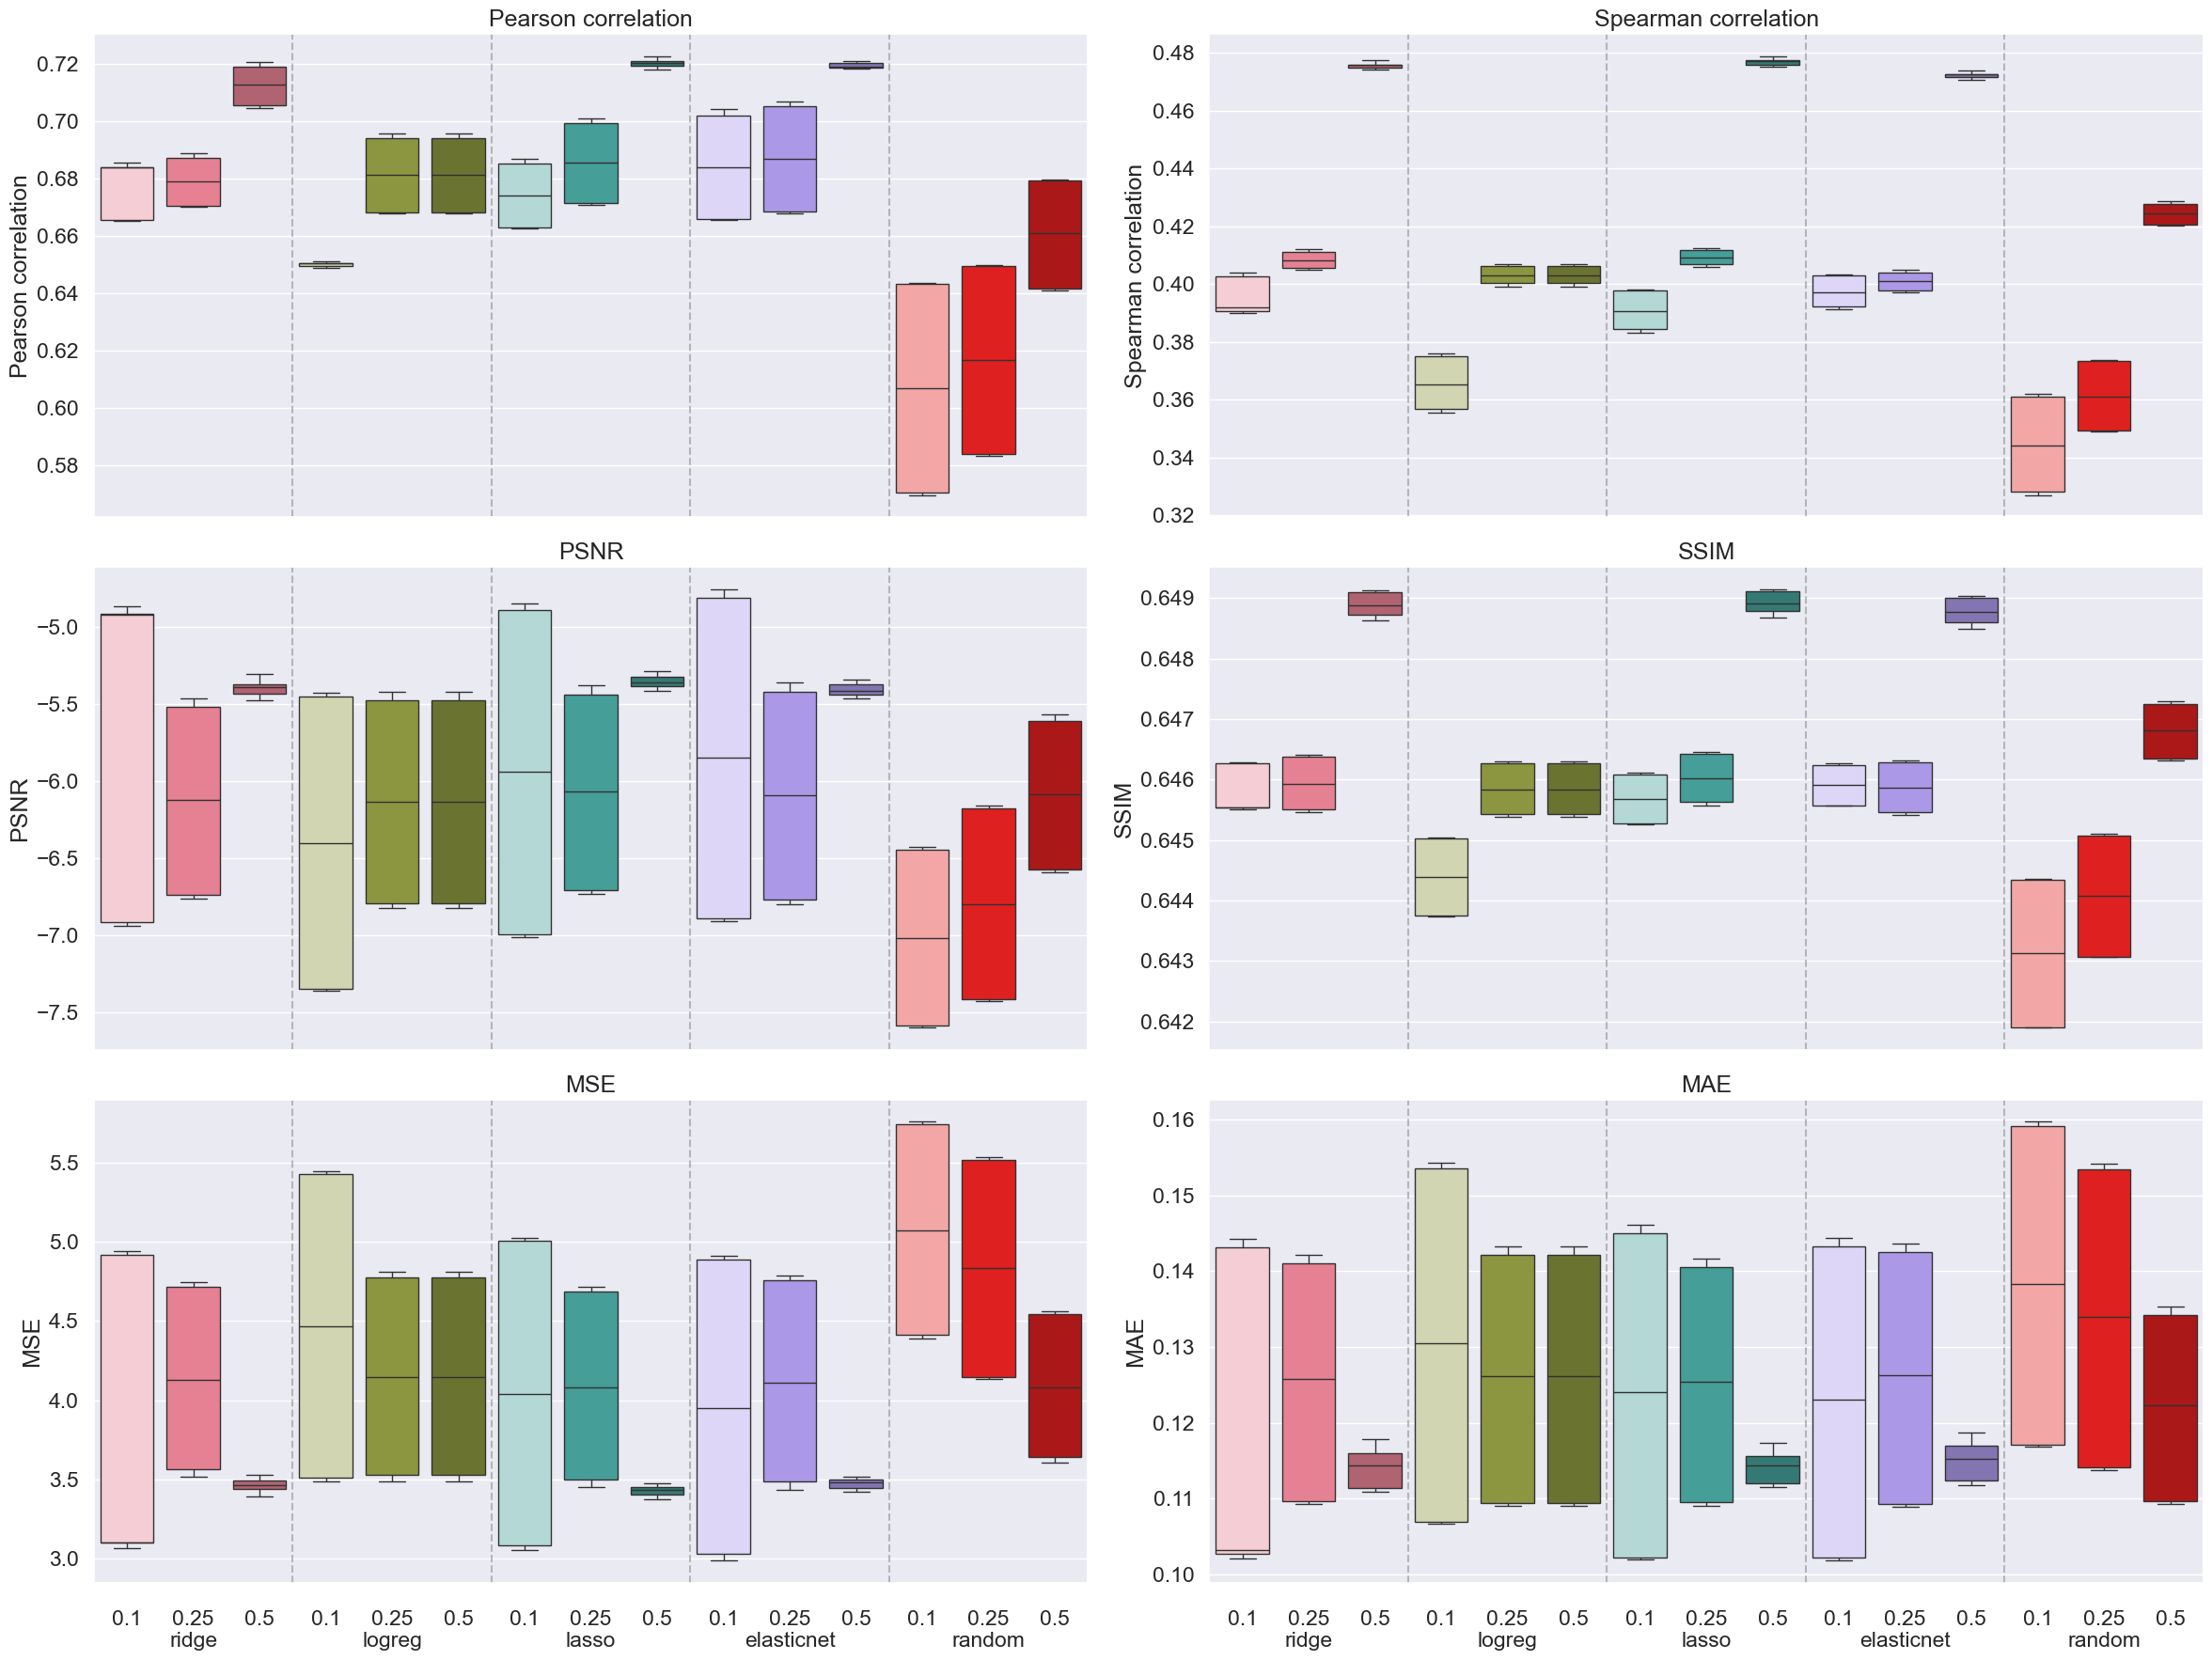

In [42]:
# aggregated
fig, ax = plt.subplots(3,2, figsize=(24, 18), sharex=True)
ax = ax.flatten()

# Plot
for i, quality_measure in enumerate([('Pearson Correlation', 'Pearson correlation'), ('Spearman Correlation', 'Spearman correlation'), ('PSNR', 'PSNR'), ('SSIM', 'SSIM'), ('MSE', 'MSE'), ('MAE', 'MAE')]):
    sns.boxplot(data=df_with_roi, x='method_sparsity', y=quality_measure[0], 
                order=ordered_methods_sparsities, palette=methods_sparsities_colors, ax=ax[i])
    
    # Add vertical lines between methods
    current_method = None
    for j, method_sparsity in enumerate(ordered_methods_sparsities):
        method = method_sparsity.split('_')[0]
        if method != current_method:
            if current_method is not None:
                ax[i].axvline(j - 0.5, color='gray', linestyle='--', alpha=0.5)
            current_method = method

    # Set titles and labels
    ax[i].set_title(f'{quality_measure[1]}')
    ax[i].set_ylabel(f'{quality_measure[1]}')
    ax[i].set_xlabel('')
    
    # Create tiered xticks
    labels = []
    for method_sparsity in ordered_methods_sparsities:
        method, sparsity = method_sparsity.split('_')
        if sparsity=="0.25":
            labels.append(f"{sparsity}\n{method}")
            current_method = method
        else:
            labels.append(f"{sparsity}")
    ax[i].set_xticklabels(labels, rotation=0)
    ax[i].tick_params(axis='x', which='major', pad=15)

plt.tight_layout()
plt.savefig('../figures/fig6/roi_quality_method_sparsity.png', bbox_inches='tight')
plt.show()

## Fig 7: Impact of HiCNN model on performance metrics

In [54]:
os.makedirs('../figures/fig7', exist_ok=True)

In [195]:
hicnn_model_colors = {
    1: "#9B59B6",  # purple
    2: "#f28892",  # pink
    3: "#edb038"   # orange
}

In [196]:
models = [1, 2, 3]

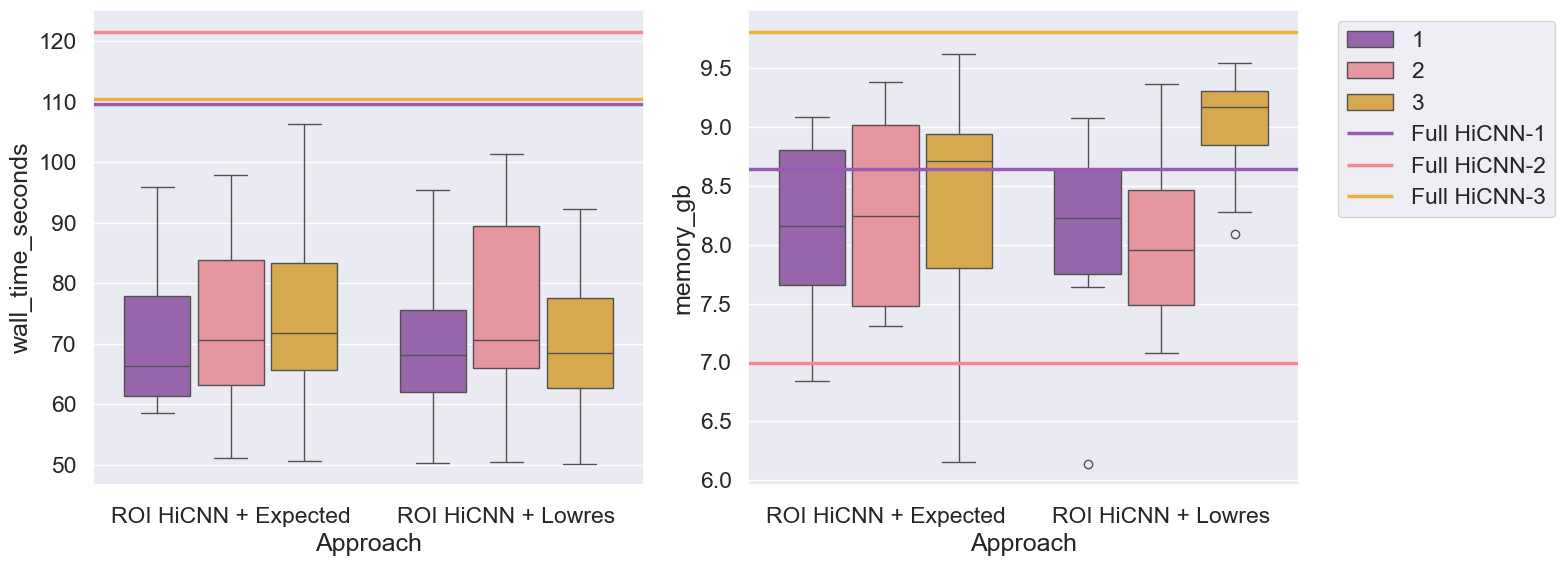

In [199]:
# Create a combined visualization of HiCNN model performance
fig, ax = plt.subplots(1,2, figsize=(16, 6), sharex=True)
ax = ax.flatten()

for i, performance_metric in enumerate([('wall_time_seconds', 'Wall time (s)'), ('memory_gb', 'Memory usage (GB)')]):
    
    # Plot box plots for approaches with multiple datapoints
    sns.boxplot(x='Approach', y=performance_metric[0], hue='MODEL', data=df_without_random[df_without_random['Approach'] != 'Full HiCNN'], palette=hicnn_model_colors, ax=ax[i], gap=0.1)

    
    ax[i].xaxis.set_tick_params(pad=10)
    ax[i].legend_.remove()

    # Add the full HiCNN single datapoints
    xmin, xmax = ax[i].get_xlim()
    full_data = df_without_random[df_without_random['Approach'] == 'Full HiCNN']
    for hicnn_model, color in hicnn_model_colors.items():
        model_data = full_data[full_data['MODEL'] == hicnn_model]
        if not model_data.empty:
            ax[i].hlines(y=model_data[performance_metric[0]].values[0], color=color, label=f'Full HiCNN-{hicnn_model}', linewidth=2.5, xmin=xmin, xmax=xmax, linestyle='-')

    ax[i].margins(x=0)

#plt.title(f'HiCNN Model Performance Comparison ({performance_metric[1]})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'../figures/fig7/performance_model_{performance_metric[1].lower()}.png', bbox_inches='tight')
plt.show()


## Fig 8: Impact of HiCNN model on quality metrics

In [ ]:
os.makedirs('../figures/fig8', exist_ok=True)

## Fig 9: Comprehensive summary

In [363]:
os.makedirs('../figures/fig9', exist_ok=True)